In [1]:
from eeg_net.eeg_resnet import * 
from eeg_net.eeg_net_base import *
from eeg_net.eeg_rnn import * 
from eeg_net.eeg_cnn import *
import numpy as np 
import matplotlib.pyplot as plt 
from torchsummary import summary
from eeg_net.solver import * 
%load_ext autoreload
%autoreload 2
%matplotlib inline
c

X_test = np.load("data/X_test.npy")
y_test = np.load("data/y_test.npy")
person_train_valid = np.load("data/person_train_valid.npy")
X_train_valid = np.load("data/X_train_valid.npy")
y_train_valid = np.load("data/y_train_valid.npy")
person_test = np.load("data/person_test.npy")

print ('Training/Valid data shape: {}'.format(X_train_valid.shape))
print ('Test data shape: {}'.format(X_test.shape))
print ('Training/Valid target shape: {}'.format(y_train_valid.shape))
print ('Test target shape: {}'.format(y_test.shape))
print ('Person train/valid shape: {}'.format(person_train_valid.shape))
print ('Person test shape: {}'.format(person_test.shape))
X_test_dir = './data/X_test.npy'
y_test_dir = './data/y_test.npy' 
X_train_valid_dir = './data/X_train_valid.npy' 
y_train_valid_dir = './data/y_train_valid.npy'
X_test_dsample_dir = './data/X_test_downsample.npy'
y_test_dsample_dir = './data/y_test_downsample.npy' 
X_train_valid_dsample_dir = './data/X_train_valid_downsample.npy' 
y_train_valid_dsample_dir = './data/y_train_valid_downsample.npy'
X_test_ds = np.load(X_test_dsample_dir)
y_test_ds = np.load(y_test_dsample_dir)
X_train_valid_ds = np.load(X_train_valid_dsample_dir)
y_train_valid_ds = np.load(y_train_valid_dsample_dir)

X_train_val_05_70_dir = './data/band_pass_data/X_train_val_05_70.npy'
X_train_val_01_70_dir = './data/band_pass_data/X_train_val_01_70.npy' 
X_train_val_05_70_ds_dir = './data/band_pass_data/X_train_val_downsample_05_70.npy'
X_train_val_01_70_ds_dir = './data/band_pass_data/X_train_val_downsample_01_70.npy' 
X_train_val_01_45_dir = './data/band_pass_data/X_train_val_01_45.npy'
X_train_val_01_45_ds_dir = './data/band_pass_data/X_train_val_downsample_01_45.npy' 


X_test_05_70_dir = './data/band_pass_data/X_test_05_70.npy'
X_test_01_70_dir = './data/band_pass_data/X_test_01_70.npy' 
X_test_05_70_ds_dir = './data/band_pass_data/X_test_downsample_05_70.npy'
X_test_01_70_ds_dir = './data/band_pass_data/X_test_downsample_01_70.npy' 
X_test_01_45_dir = './data/band_pass_data/X_test_01_45.npy'
X_test_01_45_ds_dir = './data/band_pass_data/X_test_downsample_01_45.npy' 




X_train_val_ds_norm_dir = './data/band_pass_data/X_test_downsample_norm.npy'
X_train_valid_ds_01_45_norm_dir= './data/band_pass_data/X_test_val_downsample_01_45_norm.npy'

X_train_valid_ds_fftmag_dir= './data/band_pass_data/X_test_val_downsample_fft_mag.npy'
X_train_valid_ds_fftphase_dir= './data/band_pass_data/X_test_val_downsample_fft_phase.npy'



X_train_val_05_70 = np.load(X_train_val_05_70_dir)
X_train_val_01_70 = np.load(X_train_val_01_70_dir) 
X_train_val_05_70_ds = np.load(X_train_val_05_70_ds_dir)
X_train_val_01_70_ds = np.load(X_train_val_01_70_ds_dir)

test_model_trails = 10 


Training/Valid data shape: (2115, 22, 1000)
Test data shape: (443, 22, 1000)
Training/Valid target shape: (2115,)
Test target shape: (443,)
Person train/valid shape: (2115, 1)
Person test shape: (443, 1)


Start training...
Epoch	Train Loss	Train Acc	Test Loss	Test_Acc	
--Iter 49	1.548486
0	1.688610	0.264656	1.369066	0.283688	
--Iter 49	1.559235
1	1.533514	0.323197	1.325568	0.392435	
--Iter 49	1.158885
2	1.465316	0.333811	1.312610	0.392435	
--Iter 49	1.621496
3	1.429529	0.353774	1.299494	0.406619	
--Iter 49	1.333606
4	1.372317	0.373652	1.275656	0.427896	
--Iter 49	1.289607
5	1.315945	0.412146	1.248348	0.460993	
--Iter 49	1.318362
6	1.213220	0.453588	1.230936	0.475177	
--Iter 49	1.293545
7	1.189477	0.480374	1.212144	0.470449	
--Iter 49	1.372792
8	1.157450	0.487618	1.184789	0.496454	
--Iter 49	0.972936
9	1.117697	0.519036	1.189752	0.465721	
--Iter 49	1.139075
10	1.094883	0.545569	1.160113	0.496454	
--Iter 49	1.188666
11	1.046102	0.550371	1.146781	0.522459	
--Iter 49	0.909035
12	1.016925	0.579852	1.127341	0.520095	
--Iter 49	1.163165
13	1.012718	0.579094	1.147434	0.501182	
--Iter 49	1.024744
14	0.975116	0.603352	1.102946	0.548463	
--Iter 49	1.015530
15	0.952566	0.632160	1.102286	0.546099	
-

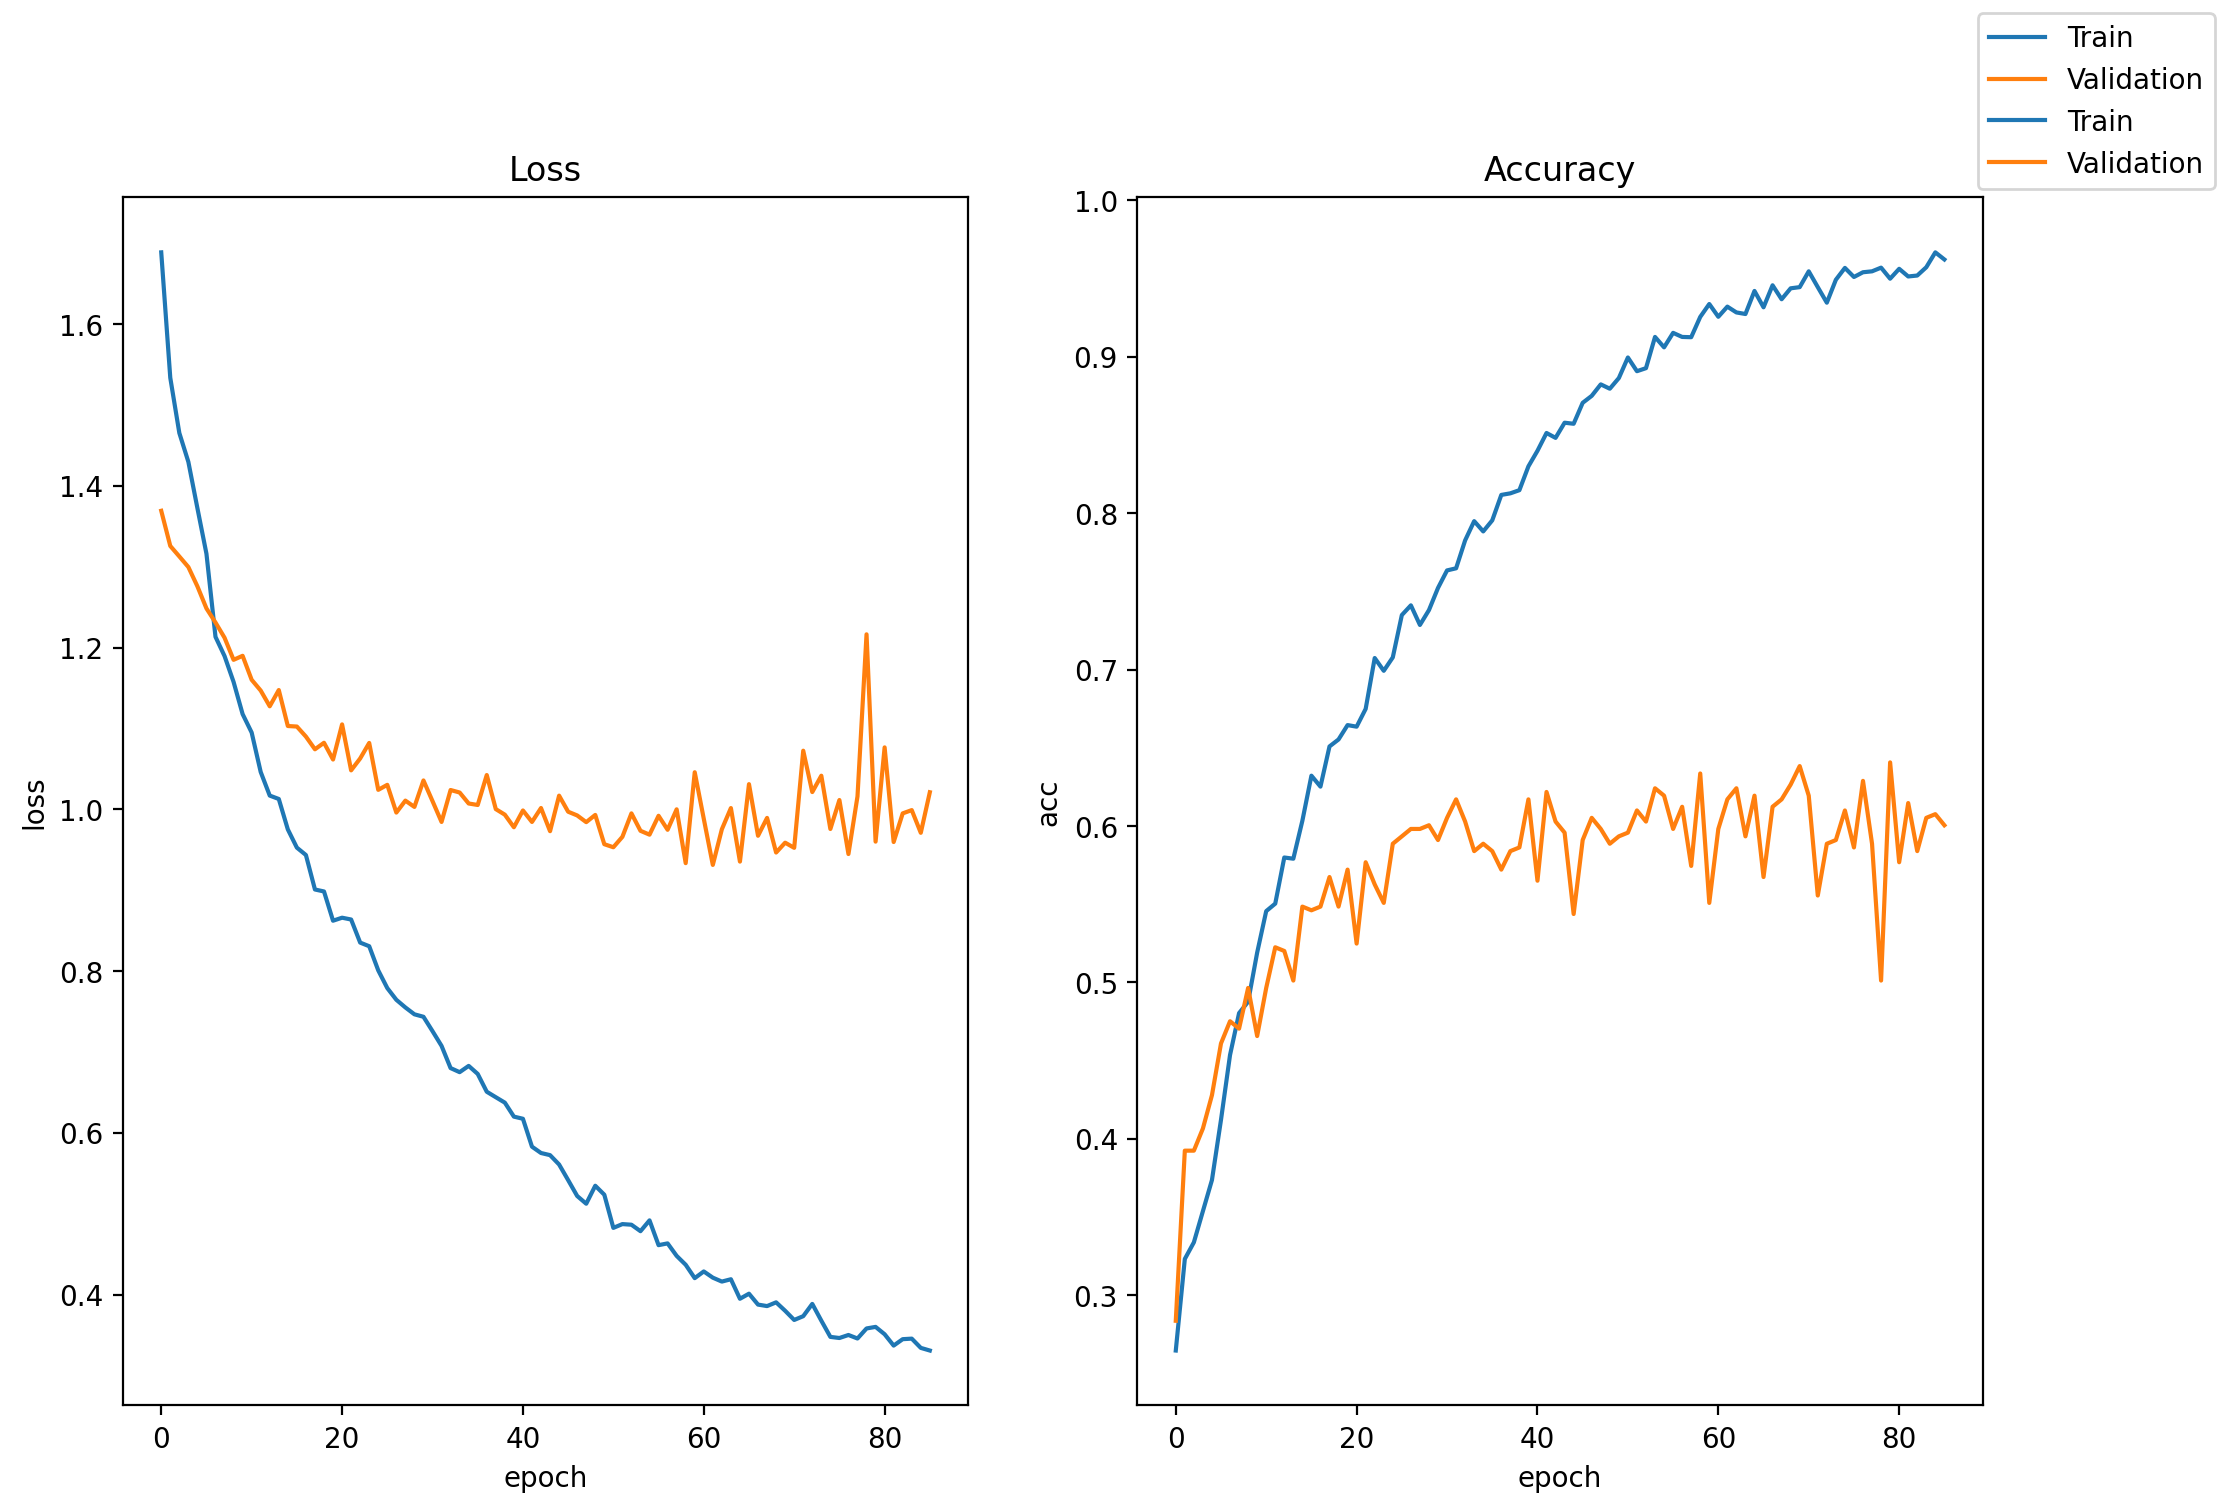

In [114]:
encoder_opt = {
    'conv1_size': 7,
    'conv1_out_channel': 22,
    'conv2_size': 7,
    'conv2_out_channel': 44,
    'conv3_size': 7,
    'conv3_out_channel': 22,
    'conv1_pool':2,
    'conv2_pool':2,
    'conv3_pool':2,
    'activation': 'none',
    'pool_type': 'max'   
}

decoder_opt = {
    'activation': 'none',
    'drop_rate' :0.9, 
    'linear1_out':80,
}
train_options = {
    'train_batch_size': 32,
    'scheduler_patience': 100,
    'scheduler_factor': 0.5,
    'weight_decay': 0.15,
    'val_batch_size': 1,
    'learning_rate': 1e-4,
    'epoch_num': 150,
}
model = EEG1D3LCNN(input_size=(1,22,1000),
                encoder_opt=encoder_opt,
                decoder_opt=decoder_opt).to('cuda')
loss_fn = nn.CrossEntropyLoss()
logs,_= train(model, train_options, loss_fn,
        data_dir=X_train_valid_dir,
        label_dir=y_train_valid_dir,
        preload_gpu=True)

In [115]:
encoder_opt = {
    'conv1_size': 5,
    'conv1_out_channel': 22,
    'conv2_size': 5,
    'conv2_out_channel': 44,
    'conv3_size': 5,
    'conv3_out_channel': 12,
    'conv1_pool':2,
    'conv2_pool':2,
    'conv3_pool':2,
    'activation': 'none',
    'pool_type': 'max'
    
}
decoder_opt={
    'drop_rate': 0.5, 
    'linear1_out': 64, 
    'activation': 'leaky_relu',
    'avg_pool_size':4
}


train_options = {
    'train_batch_size': 64,
    'scheduler_patience': 150,
    'scheduler_factor': 0.5,
    'weight_decay': 0.15,
    'val_batch_size': 1,
    'learning_rate': 1e-4,
    'epoch_num': 400,
    'downsample_split': True,
}
loss_fn = nn.CrossEntropyLoss()
model = EEG1D3LCNN(in_channels=22,
                input_size=(1,22,500),
                encoder_opt=encoder_opt,
                decoder_opt=decoder_opt).to('cuda')
summary(model.cuda(),(1,22,500))

logs,_= train(model, train_options, loss_fn,
        data_dir=X_train_val_01_45_ds_dir,
        label_dir=y_train_valid_dsample_dir,
        preload_gpu=True)


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
        Conv2dAuto-1           [-1, 22, 1, 500]           2,420
       BatchNorm2d-2           [-1, 22, 1, 500]              44
         MaxPool2d-3           [-1, 22, 1, 250]               0
          Identity-4           [-1, 22, 1, 250]               0
        Conv2dAuto-5           [-1, 44, 1, 250]           4,840
       BatchNorm2d-6           [-1, 44, 1, 250]              88
         MaxPool2d-7           [-1, 44, 1, 125]               0
          Identity-8           [-1, 44, 1, 125]               0
        Conv2dAuto-9           [-1, 12, 1, 125]           2,640
      BatchNorm2d-10           [-1, 12, 1, 125]              24
        MaxPool2d-11            [-1, 12, 1, 62]               0
         Identity-12            [-1, 12, 1, 62]               0
  EEGCNNv3Encoder-13                  [-1, 744]               0
           Linear-14                   

KeyboardInterrupt: 

### Tes for normalized data 

In [117]:
encoder_opt = {
    'conv1_size': 3,
    'conv1_out_channel': 22,
    'conv2_size': 3,
    'conv2_out_channel': 44,
    'conv3_size': 3,
    'conv3_out_channel': 22,
    'conv1_pool':2,
    'conv2_pool':2,
    'conv3_pool':2,
    'activation': 'none',
    'pool_type': 'max'
    
}
decoder_opt={
    'drop_rate': 0.8, 
    'linear1_out': 64, 
    'activation': 'leaky_relu',
    'avg_pool_size':2
}


train_options = {
    'train_batch_size': 64,
    'scheduler_patience': 170,
    'scheduler_factor': 0.25,
    'weight_decay': 0.10,
    'val_batch_size': 1,
    'learning_rate': 1e-4,
    'epoch_num': 1000,
    'downsample_split': True,
}

model = EEG1D3LCNN(in_channels=22,
                input_size=(1,22,500),
                encoder_opt=encoder_opt,
                decoder_opt=decoder_opt).to('cuda')
summary(model.cuda(),(1,22,500))
loss_fn = nn.CrossEntropyLoss()
logs,_= train(model, train_options, loss_fn,
        data_dir=X_train_valid_ds_01_45_norm_dir,
        label_dir=y_train_valid_dsample_dir,
        preload_gpu=True)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
        Conv2dAuto-1           [-1, 22, 1, 500]           1,452
       BatchNorm2d-2           [-1, 22, 1, 500]              44
         MaxPool2d-3           [-1, 22, 1, 250]               0
          Identity-4           [-1, 22, 1, 250]               0
        Conv2dAuto-5           [-1, 44, 1, 250]           2,904
       BatchNorm2d-6           [-1, 44, 1, 250]              88
         MaxPool2d-7           [-1, 44, 1, 125]               0
          Identity-8           [-1, 44, 1, 125]               0
        Conv2dAuto-9           [-1, 22, 1, 125]           2,904
      BatchNorm2d-10           [-1, 22, 1, 125]              44
        MaxPool2d-11            [-1, 22, 1, 62]               0
         Identity-12            [-1, 22, 1, 62]               0
  EEGCNNv3Encoder-13                 [-1, 1364]               0
           Linear-14                   

KeyboardInterrupt: 

## CNNV3 test data accuracy 



In [61]:
test_loader = eeg_test_loader(X_test_01_45_ds_dir,y_test_dsample_dir)
avg_loss, acc = test_net(model,test_loader,loss_fn,'cuda')
print('The test data set accuracy is : {}'.format(acc))

The test data set accuracy is : 0.6704288939051919


## Use fft pahse 


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
        Conv2dAuto-1           [-1, 22, 1, 500]           2,420
       BatchNorm2d-2           [-1, 22, 1, 500]              44
         MaxPool2d-3           [-1, 22, 1, 250]               0
          Identity-4           [-1, 22, 1, 250]               0
        Conv2dAuto-5           [-1, 44, 1, 250]           4,840
       BatchNorm2d-6           [-1, 44, 1, 250]              88
         MaxPool2d-7           [-1, 44, 1, 125]               0
          Identity-8           [-1, 44, 1, 125]               0
        Conv2dAuto-9           [-1, 22, 1, 125]           4,840
      BatchNorm2d-10           [-1, 22, 1, 125]              44
        MaxPool2d-11            [-1, 22, 1, 62]               0
         Identity-12            [-1, 22, 1, 62]               0
  EEGCNNv3Encoder-13                 [-1, 1364]               0
           Linear-14                   

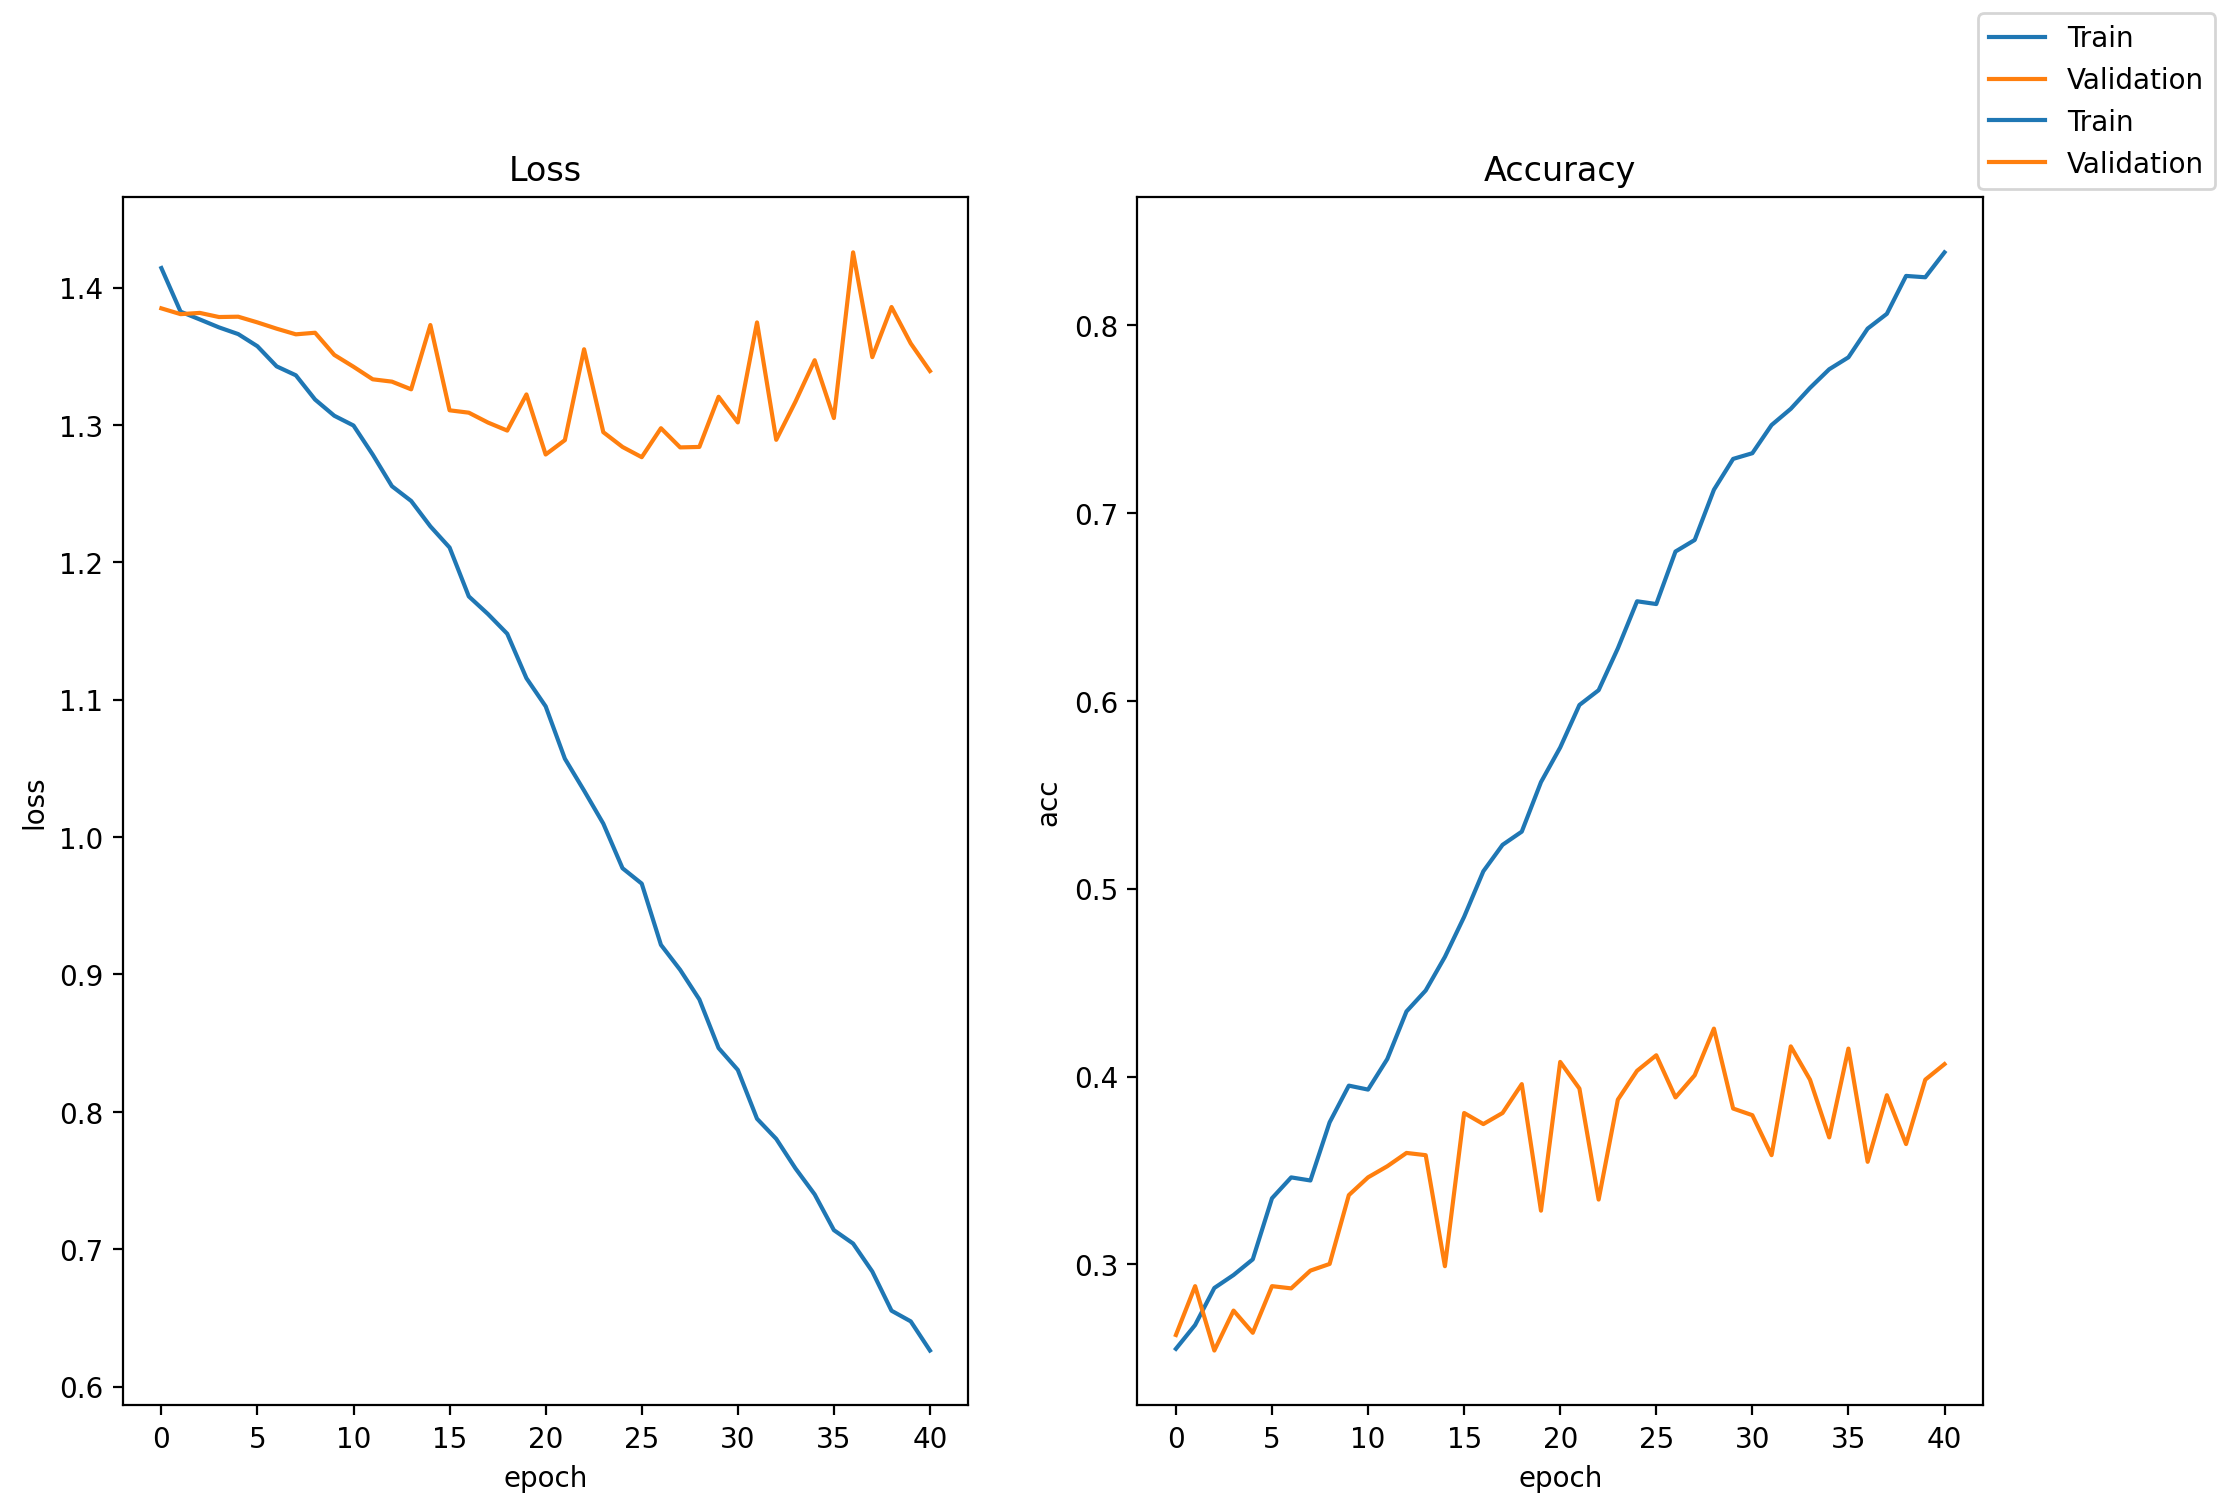

In [4]:
encoder_opt = {
    'conv1_size': 5,
    'conv1_out_channel': 22,
    'conv2_size': 5,
    'conv2_out_channel': 44,
    'conv3_size': 5,
    'conv3_out_channel': 22,
    'conv1_pool':2,
    'conv2_pool':2,
    'conv3_pool':2,
    'activation': 'none',
    'pool_type': 'max'
    
}
decoder_opt={
    'drop_rate': 0.8, 
    'linear1_out': 64, 
    'activation': 'leaky_relu',
    'avg_pool_size':4
}

model_opt = {
    'decoder_opt': decoder_opt,
    'encoder_opt':encoder_opt,
}

train_options = {
    'train_batch_size': 64,
    'scheduler_patience': 150,
    'scheduler_factor': 0.5,
    'weight_decay': 0.15,
    'val_batch_size': 1,
    'learning_rate': 1e-4,
    'epoch_num': 100,
    'downsample_split': True,
}

model = EEG1D3LCNN(in_channels=22,
                input_size=(1,22,500),
                options = model_opt).to('cuda')
summary(model.cuda(),(1,22,500))
loss_fn = nn.CrossEntropyLoss()
logs,_= train(model, train_options, loss_fn,
        data_dir=X_train_valid_ds_fftphase_dir,
        label_dir=y_train_valid_dsample_dir,
        preload_gpu=True)

45464	0.754137	
--Iter 49	0.882947
669	0.878172	0.961295	1.045562	0.749409	
--Iter 49	0.885047
670	0.878255	0.961506	1.045674	0.752955	
--Iter 49	0.872661
671	0.878265	0.962222	1.046194	0.747045	
--Iter 49	0.830996
672	0.878283	0.961759	1.046384	0.748227	
--Iter 49	0.894628
673	0.878192	0.960916	1.045499	0.751773	
--Iter 49	0.923070
674	0.878344	0.961043	1.045578	0.749409	
--Iter 49	0.889413
675	0.878289	0.961675	1.045749	0.750591	
--Iter 49	0.872078
676	0.878344	0.961295	1.045925	0.748227	
--Iter 49	0.889933
677	0.878136	0.961464	1.045956	0.754137	
--Iter 49	0.882413
678	0.878162	0.961548	1.046192	0.748227	
--Iter 49	0.868000
679	0.878201	0.961338	1.045474	0.749409	
--Iter 49	0.907358
680	0.878332	0.962180	1.046049	0.751773	
--Iter 49	0.844057
681	0.878137	0.962138	1.046566	0.750591	
--Iter 49	0.856768
682	0.877973	0.962264	1.045750	0.749409	
--Iter 49	0.849500
683	0.878401	0.960369	1.045869	0.749409	
--Iter 49	0.865940
684	0.878066	0.962096	1.046880	0.750591	
--Iter 49	0.899801
685	0

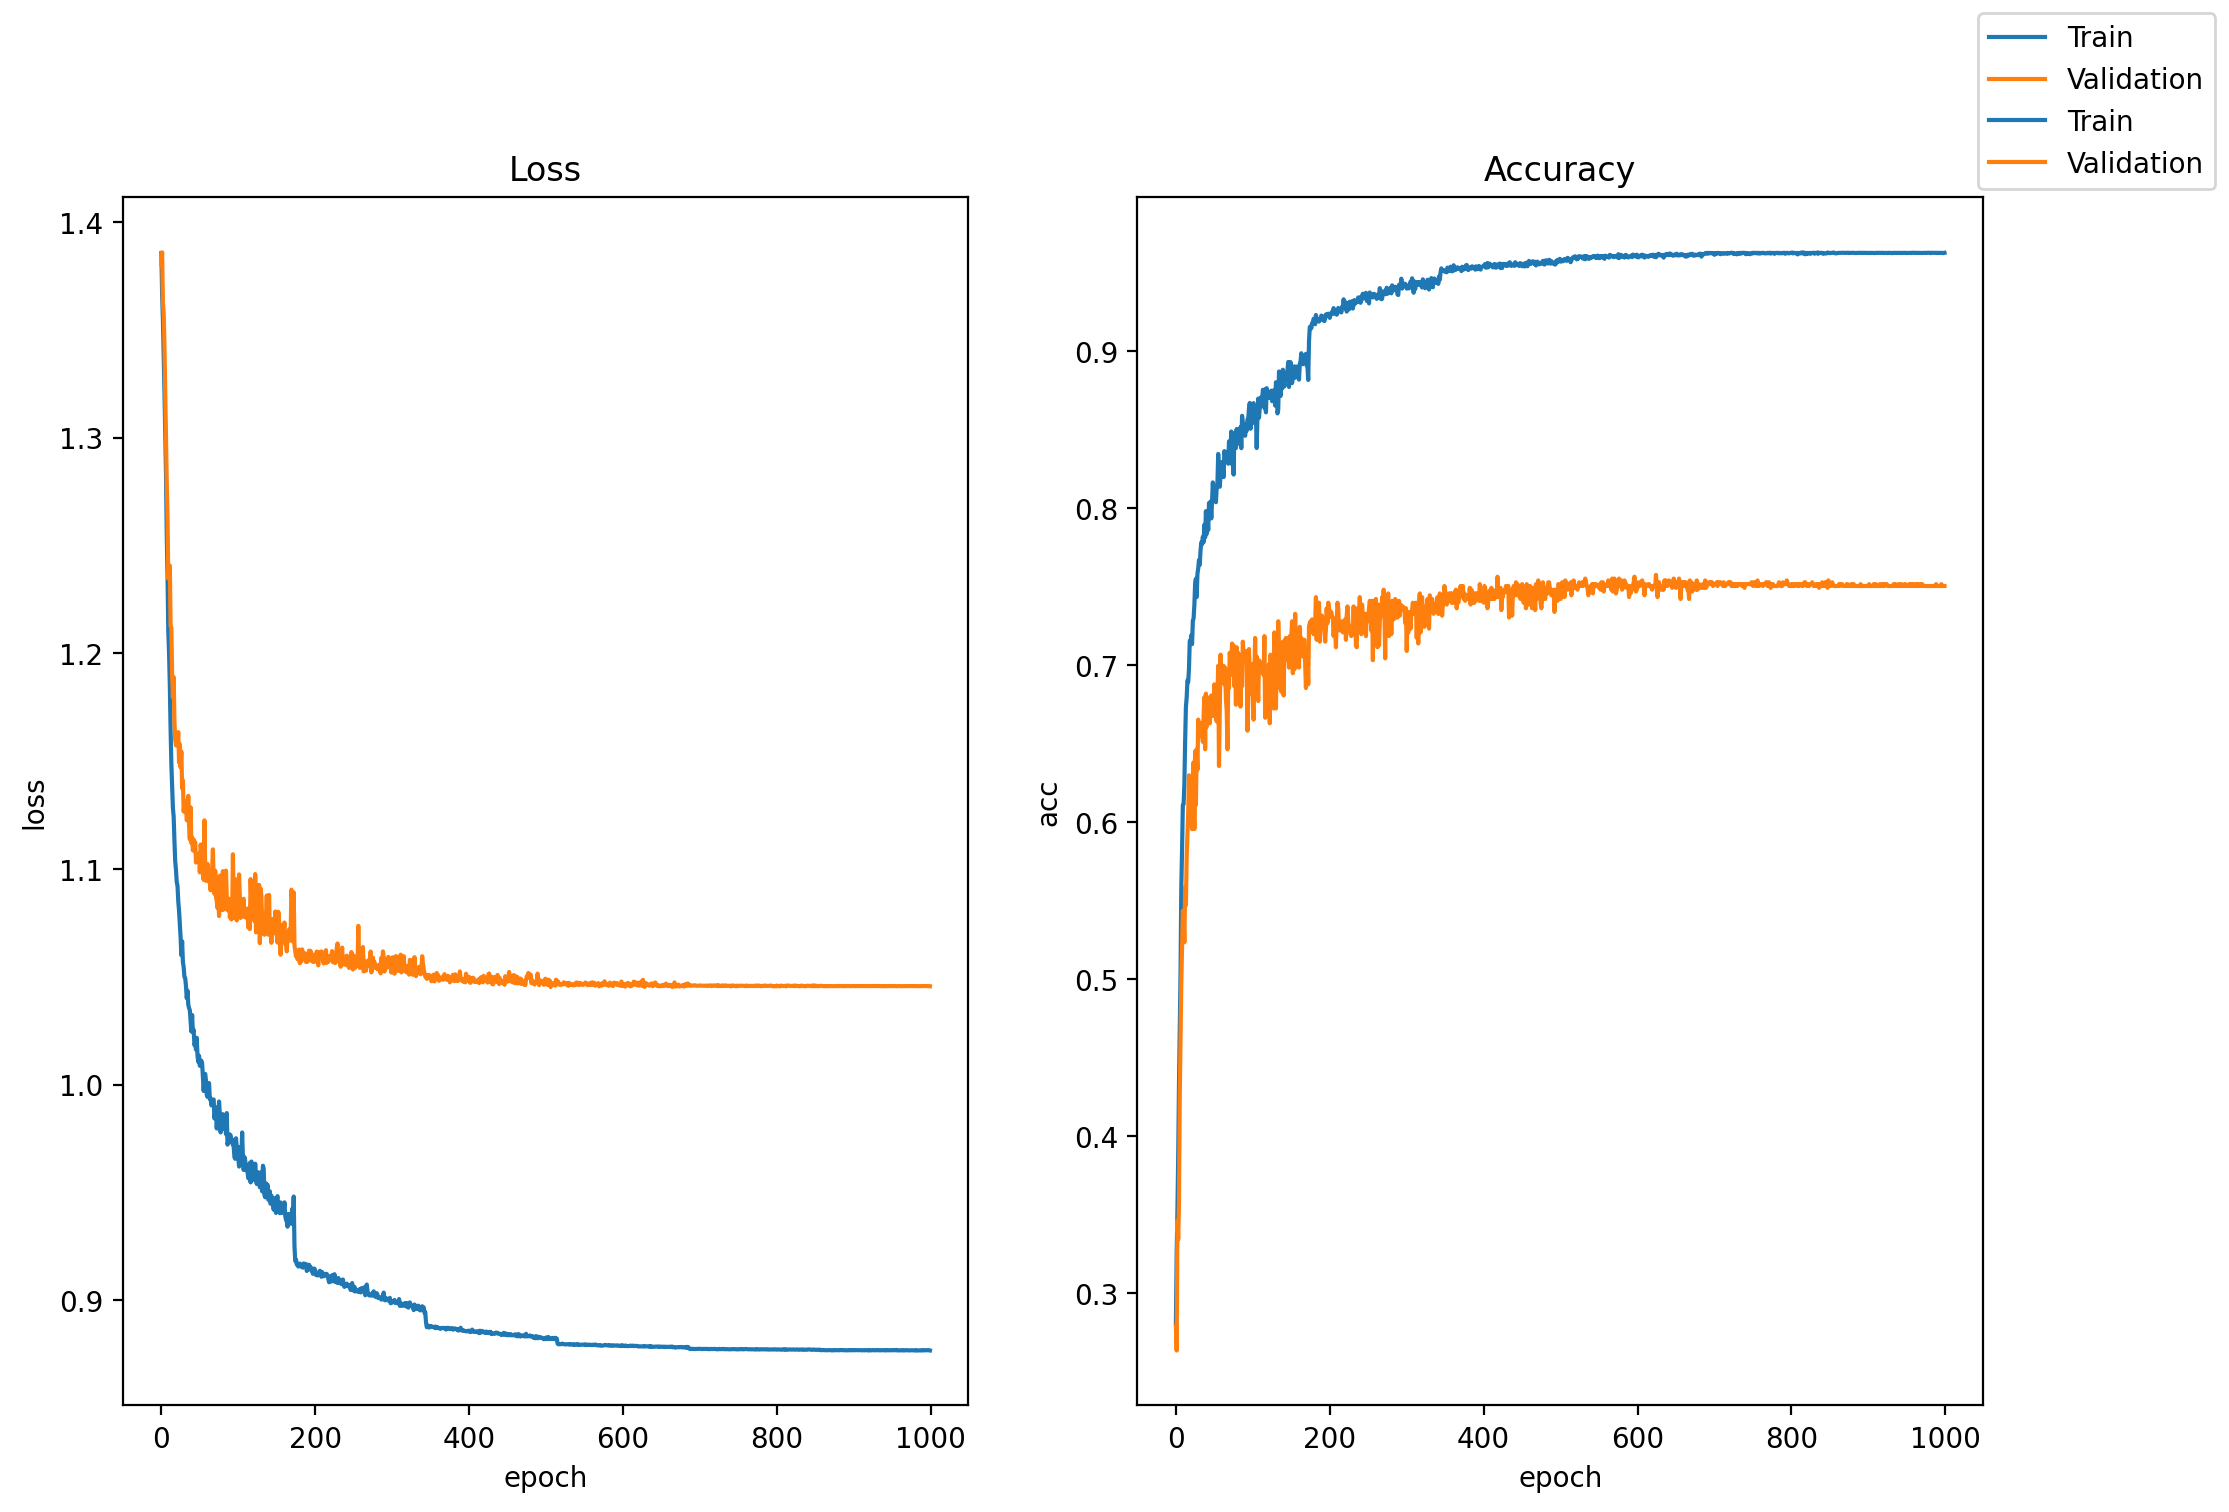

In [62]:

model = ShallowConv2(in_channels=1,classes=4).to('cuda')
loss_fn = nn.CrossEntropyLoss()
logs,_= train(model, train_options, loss_fn,
        data_dir=X_train_val_01_45_ds_dir,
        label_dir=y_train_valid_dsample_dir,
        preload_gpu=True)

In [64]:
test_loader = eeg_test_loader(X_test_01_45_ds_dir,y_test_dsample_dir)
avg_loss, acc = test_net(model,test_loader,loss_fn,'cuda')
print('The test data set accuracy is : {}'.format(acc))

The test data set accuracy is : 0.7471783295711061


.035980	0.754137	
--Iter 49	0.935369
668	0.917174	0.930003	1.034952	0.752955	
--Iter 49	0.871099
669	0.917625	0.929119	1.033974	0.756501	
--Iter 49	0.957705
670	0.917800	0.927982	1.034737	0.755319	
--Iter 49	0.930550
671	0.917463	0.929498	1.037536	0.749409	
--Iter 49	0.901301
672	0.917697	0.928614	1.036232	0.752955	
--Iter 49	0.923037
673	0.917521	0.930593	1.039134	0.742317	
--Iter 49	0.906110
674	0.917901	0.925329	1.036457	0.754137	
--Iter 49	0.925967
675	0.918195	0.928740	1.034446	0.755319	
--Iter 49	0.941183
676	0.917015	0.929709	1.033554	0.756501	
--Iter 49	0.896355
677	0.917335	0.930804	1.035512	0.756501	
--Iter 49	0.903561
678	0.917030	0.930635	1.036708	0.749409	
--Iter 49	0.907770
679	0.917720	0.929414	1.035177	0.747045	
--Iter 49	0.914528
680	0.917732	0.927982	1.034597	0.752955	
--Iter 49	0.905888
681	0.917350	0.929919	1.034721	0.751773	
--Iter 49	0.952893
682	0.917239	0.930467	1.034276	0.747045	
--Iter 49	0.895928
683	0.917124	0.931098	1.036263	0.751773	
--Iter 49	0.940162
684

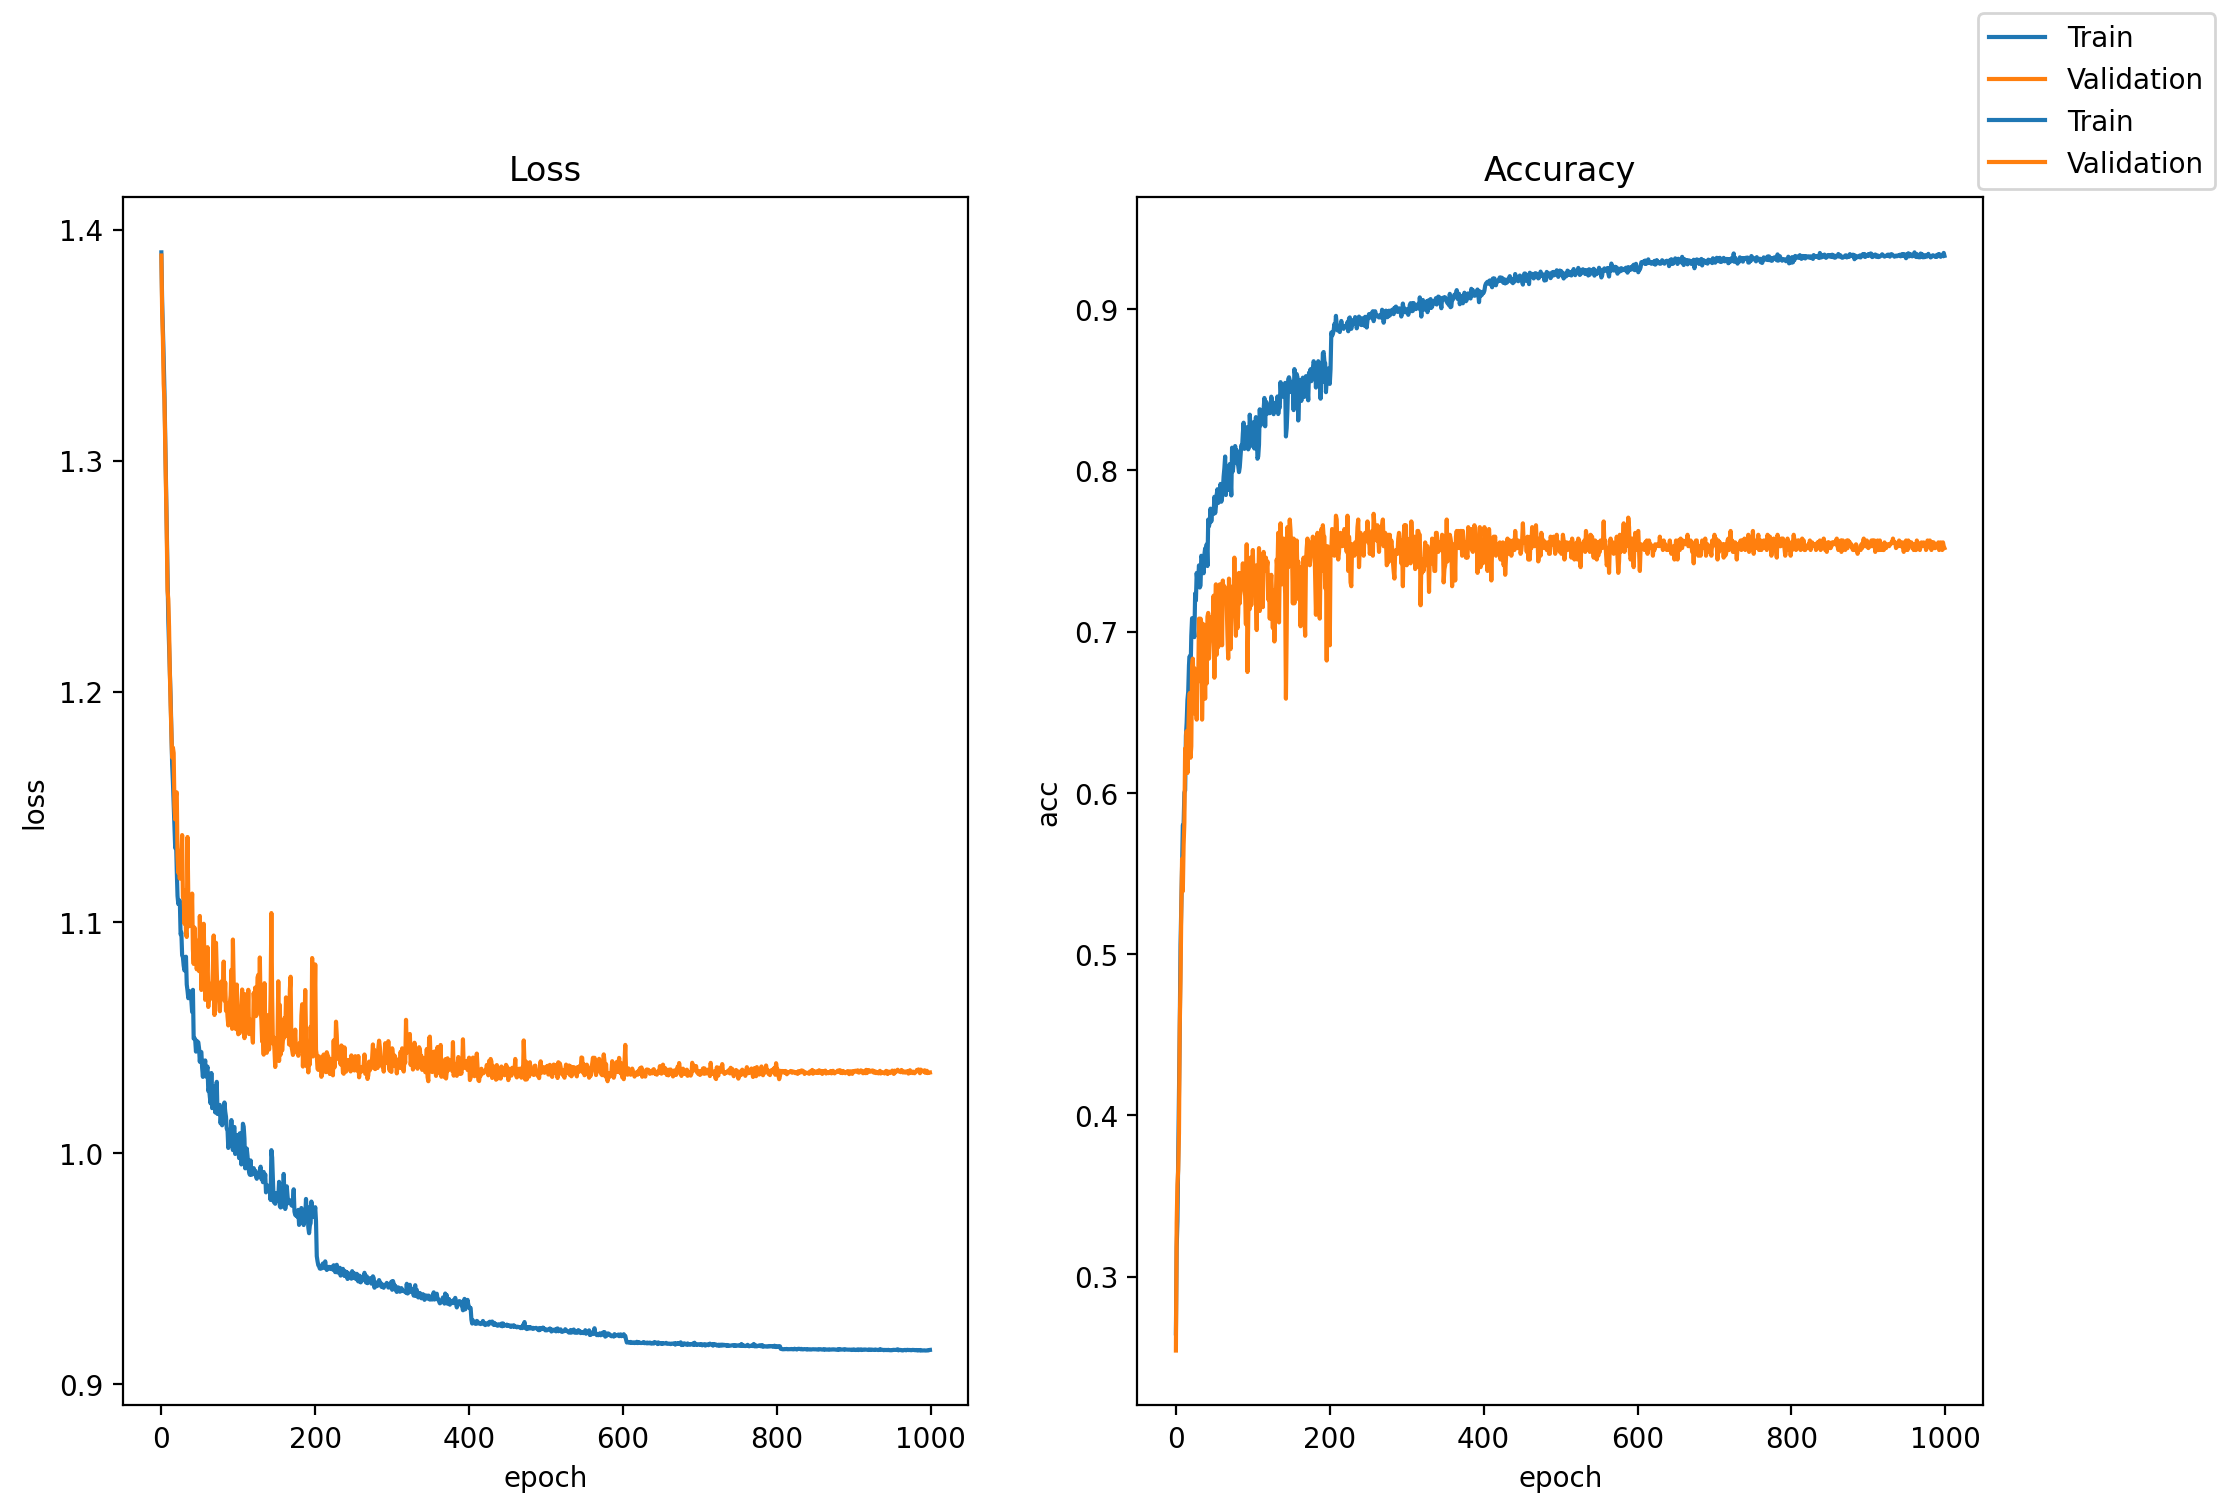

In [90]:

model = DsShallowConv(in_channels=1,classes=4).to('cuda')
summary(model.cuda(),(1,22,500))
loss_fn = nn.CrossEntropyLoss()
logs,_= train(model, train_options, loss_fn,
        data_dir=X_train_val_01_45_ds_dir,
        label_dir=y_train_valid_dsample_dir,
        preload_gpu=True)


In [91]:
test_loader = eeg_test_loader(X_test_01_45_ds_dir,y_test_dsample_dir)
avg_loss, acc = test_net(model,test_loader,loss_fn,'cuda')
print('The test data set accuracy is : {}'.format(acc))

The test data set accuracy is : 0.7313769751693002


## PSCNN


70898	0.708038	
--Iter 49	0.969046
169	0.943215	0.883929	1.077362	0.703310	
--Iter 49	0.914619
170	0.955282	0.866619	1.063661	0.728132	
--Iter 49	0.947925
171	0.934640	0.893320	1.067575	0.711584	
--Iter 49	0.965285
172	0.940292	0.888603	1.061614	0.732861	
--Iter 49	0.923487
173	0.936391	0.888730	1.062326	0.734043	
--Iter 49	0.950713
174	0.931391	0.895089	1.062573	0.725768	
--Iter 49	0.930686
175	0.933888	0.898795	1.068917	0.699764	
--Iter 49	0.933031
176	0.932599	0.896563	1.061580	0.717494	
--Iter 49	0.915877
177	0.934786	0.892310	1.059977	0.722222	
--Iter 49	0.903042
178	0.936388	0.889951	1.065531	0.721040	
--Iter 49	0.913693
179	0.936943	0.887551	1.059306	0.716312	
--Iter 49	0.969104
180	0.933184	0.890625	1.070929	0.713948	
--Iter 49	0.969619
181	0.932049	0.892141	1.066712	0.718676	
--Iter 49	0.953549
182	0.932992	0.898290	1.067510	0.718676	
--Iter 49	0.921339
183	0.929146	0.903007	1.071123	0.713948	
--Iter 49	0.910017
184	0.934711	0.893742	1.071052	0.703310	
--Iter 49	0.933501
185	0

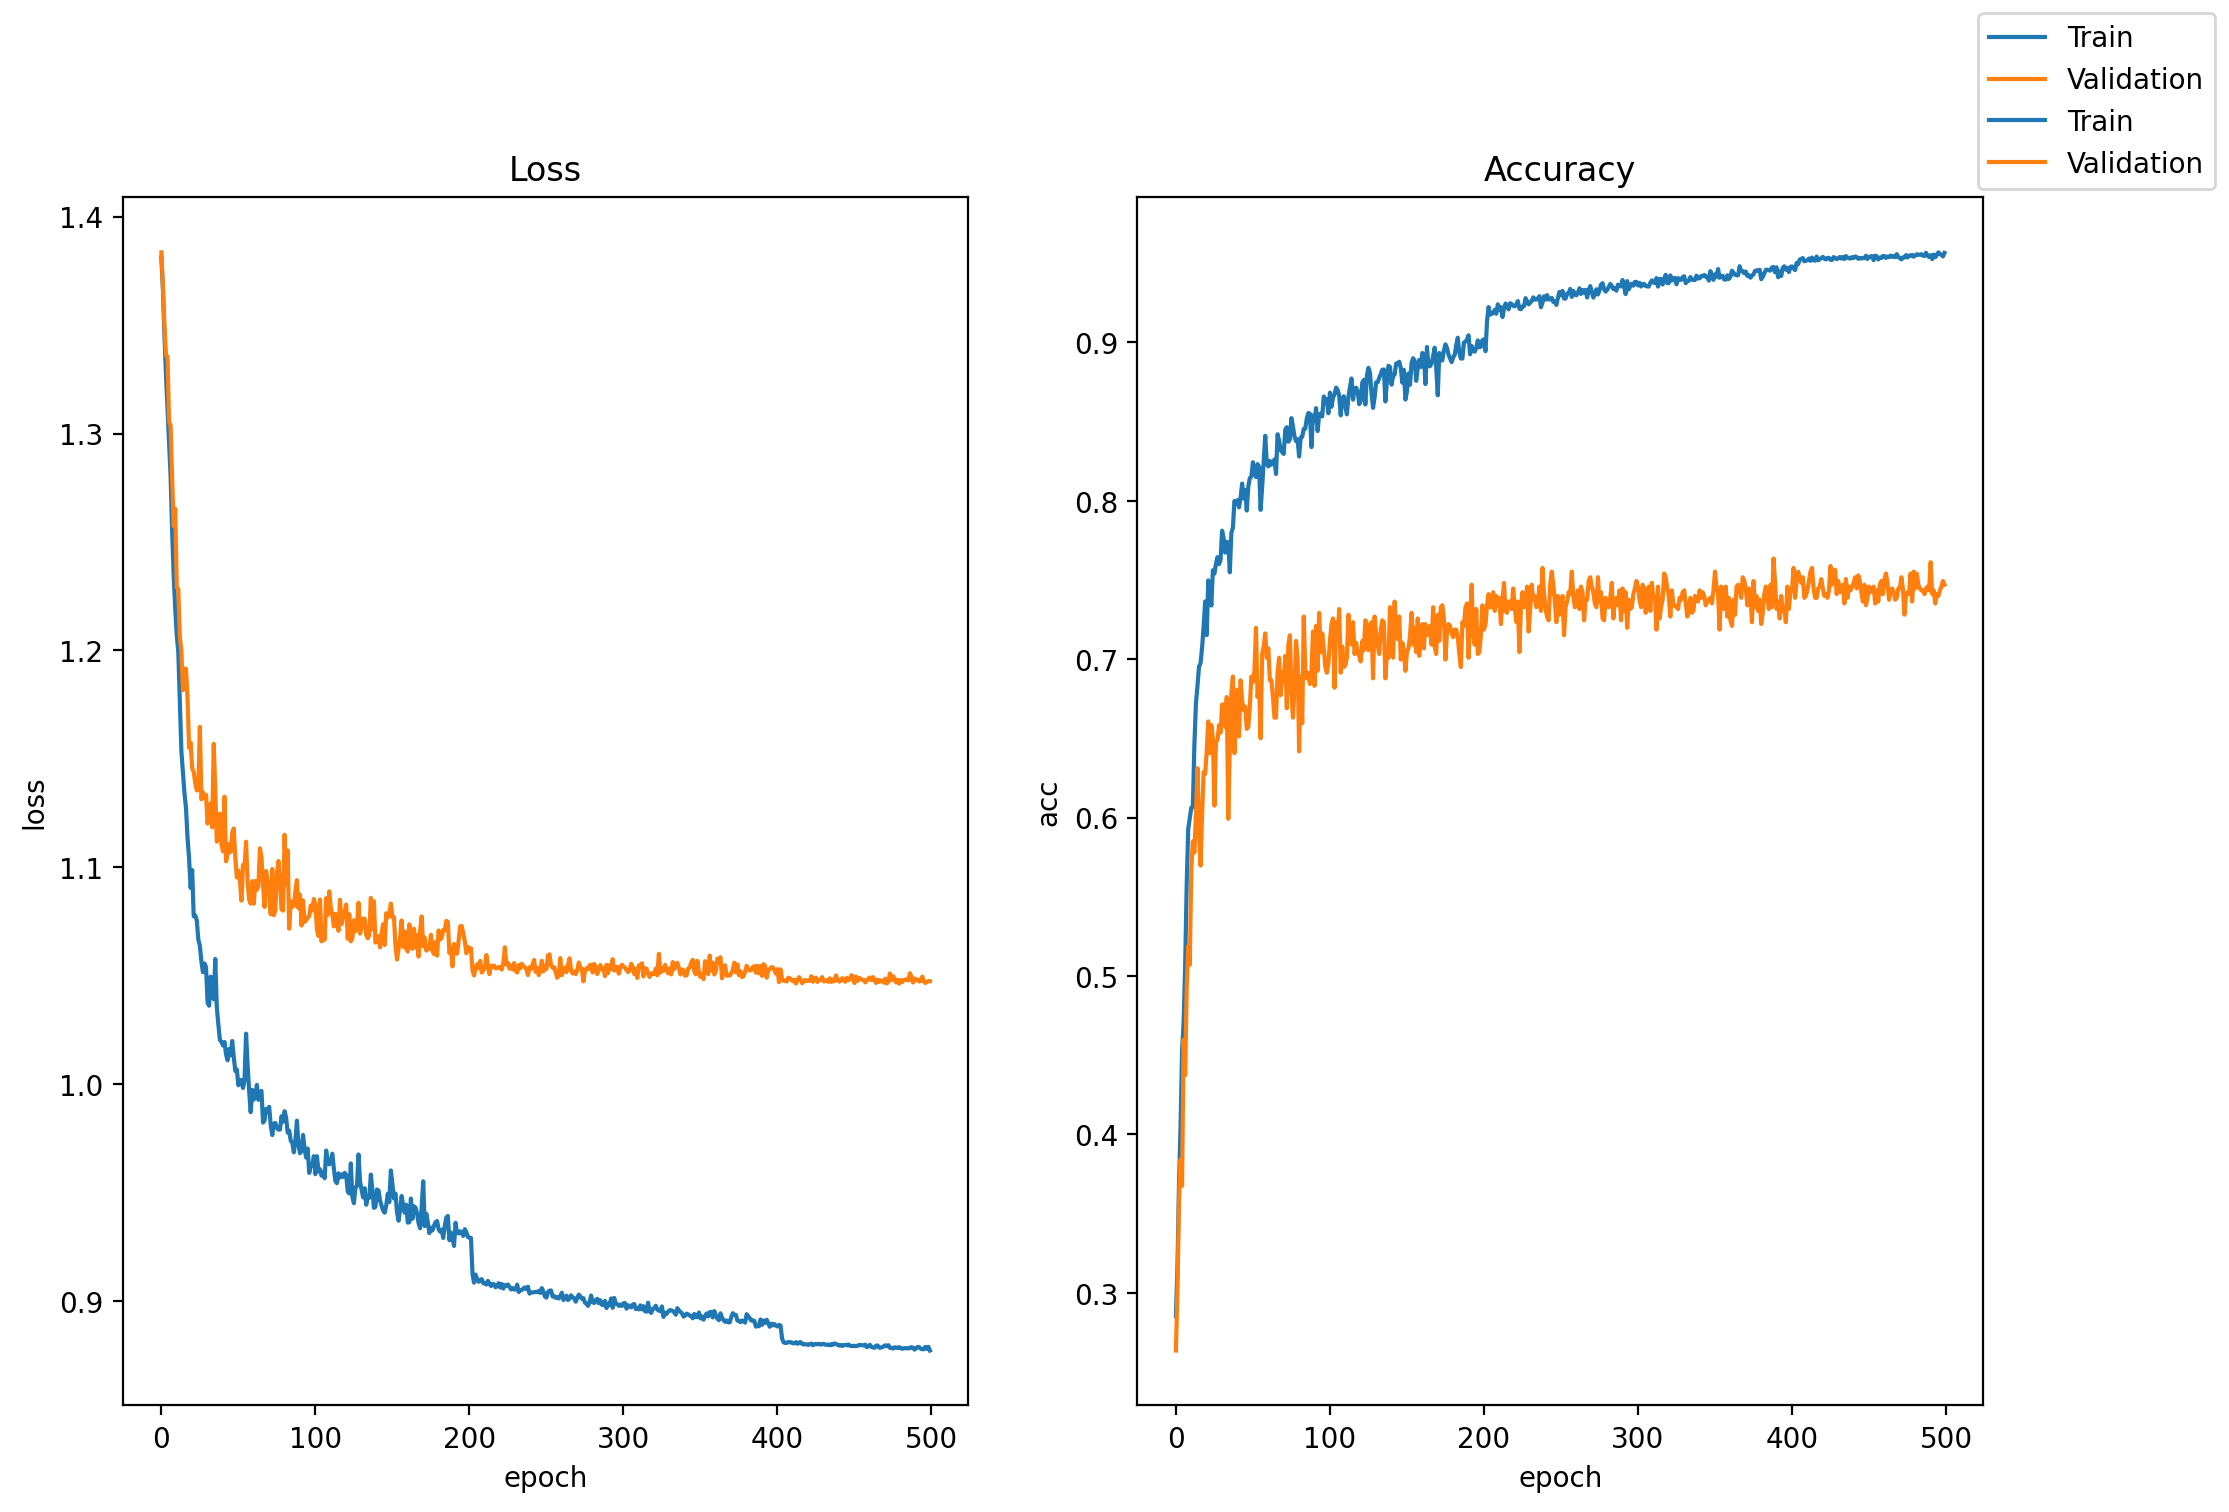

58434	0.731678	
--Iter 49	0.927150
169	0.934612	0.896184	1.049043	0.745863	
--Iter 49	0.926104
170	0.936172	0.895089	1.054302	0.730496	
--Iter 49	0.885310
171	0.940962	0.889867	1.053387	0.749409	
--Iter 49	0.950550
172	0.934465	0.895763	1.039070	0.752955	
--Iter 49	0.966372
173	0.937936	0.891509	1.061148	0.735225	
--Iter 49	0.958842
174	0.944127	0.880854	1.053861	0.737589	
--Iter 49	0.895414
175	0.938455	0.890920	1.050864	0.732861	
--Iter 49	0.950499
176	0.934332	0.895426	1.044050	0.754137	
--Iter 49	0.910633
177	0.938453	0.887508	1.045742	0.748227	
--Iter 49	0.961145
178	0.934915	0.894921	1.041419	0.756501	
--Iter 49	0.916316
179	0.934051	0.895974	1.045968	0.731678	
--Iter 49	0.947837
180	0.933907	0.898290	1.048982	0.734043	
--Iter 49	0.881086
181	0.934493	0.894331	1.046474	0.737589	
--Iter 49	0.909905
182	0.934351	0.893320	1.044499	0.744681	
--Iter 49	0.955149
183	0.934080	0.890162	1.043282	0.754137	
--Iter 49	0.920760
184	0.932864	0.900101	1.051748	0.748227	
--Iter 49	0.925138
185	0

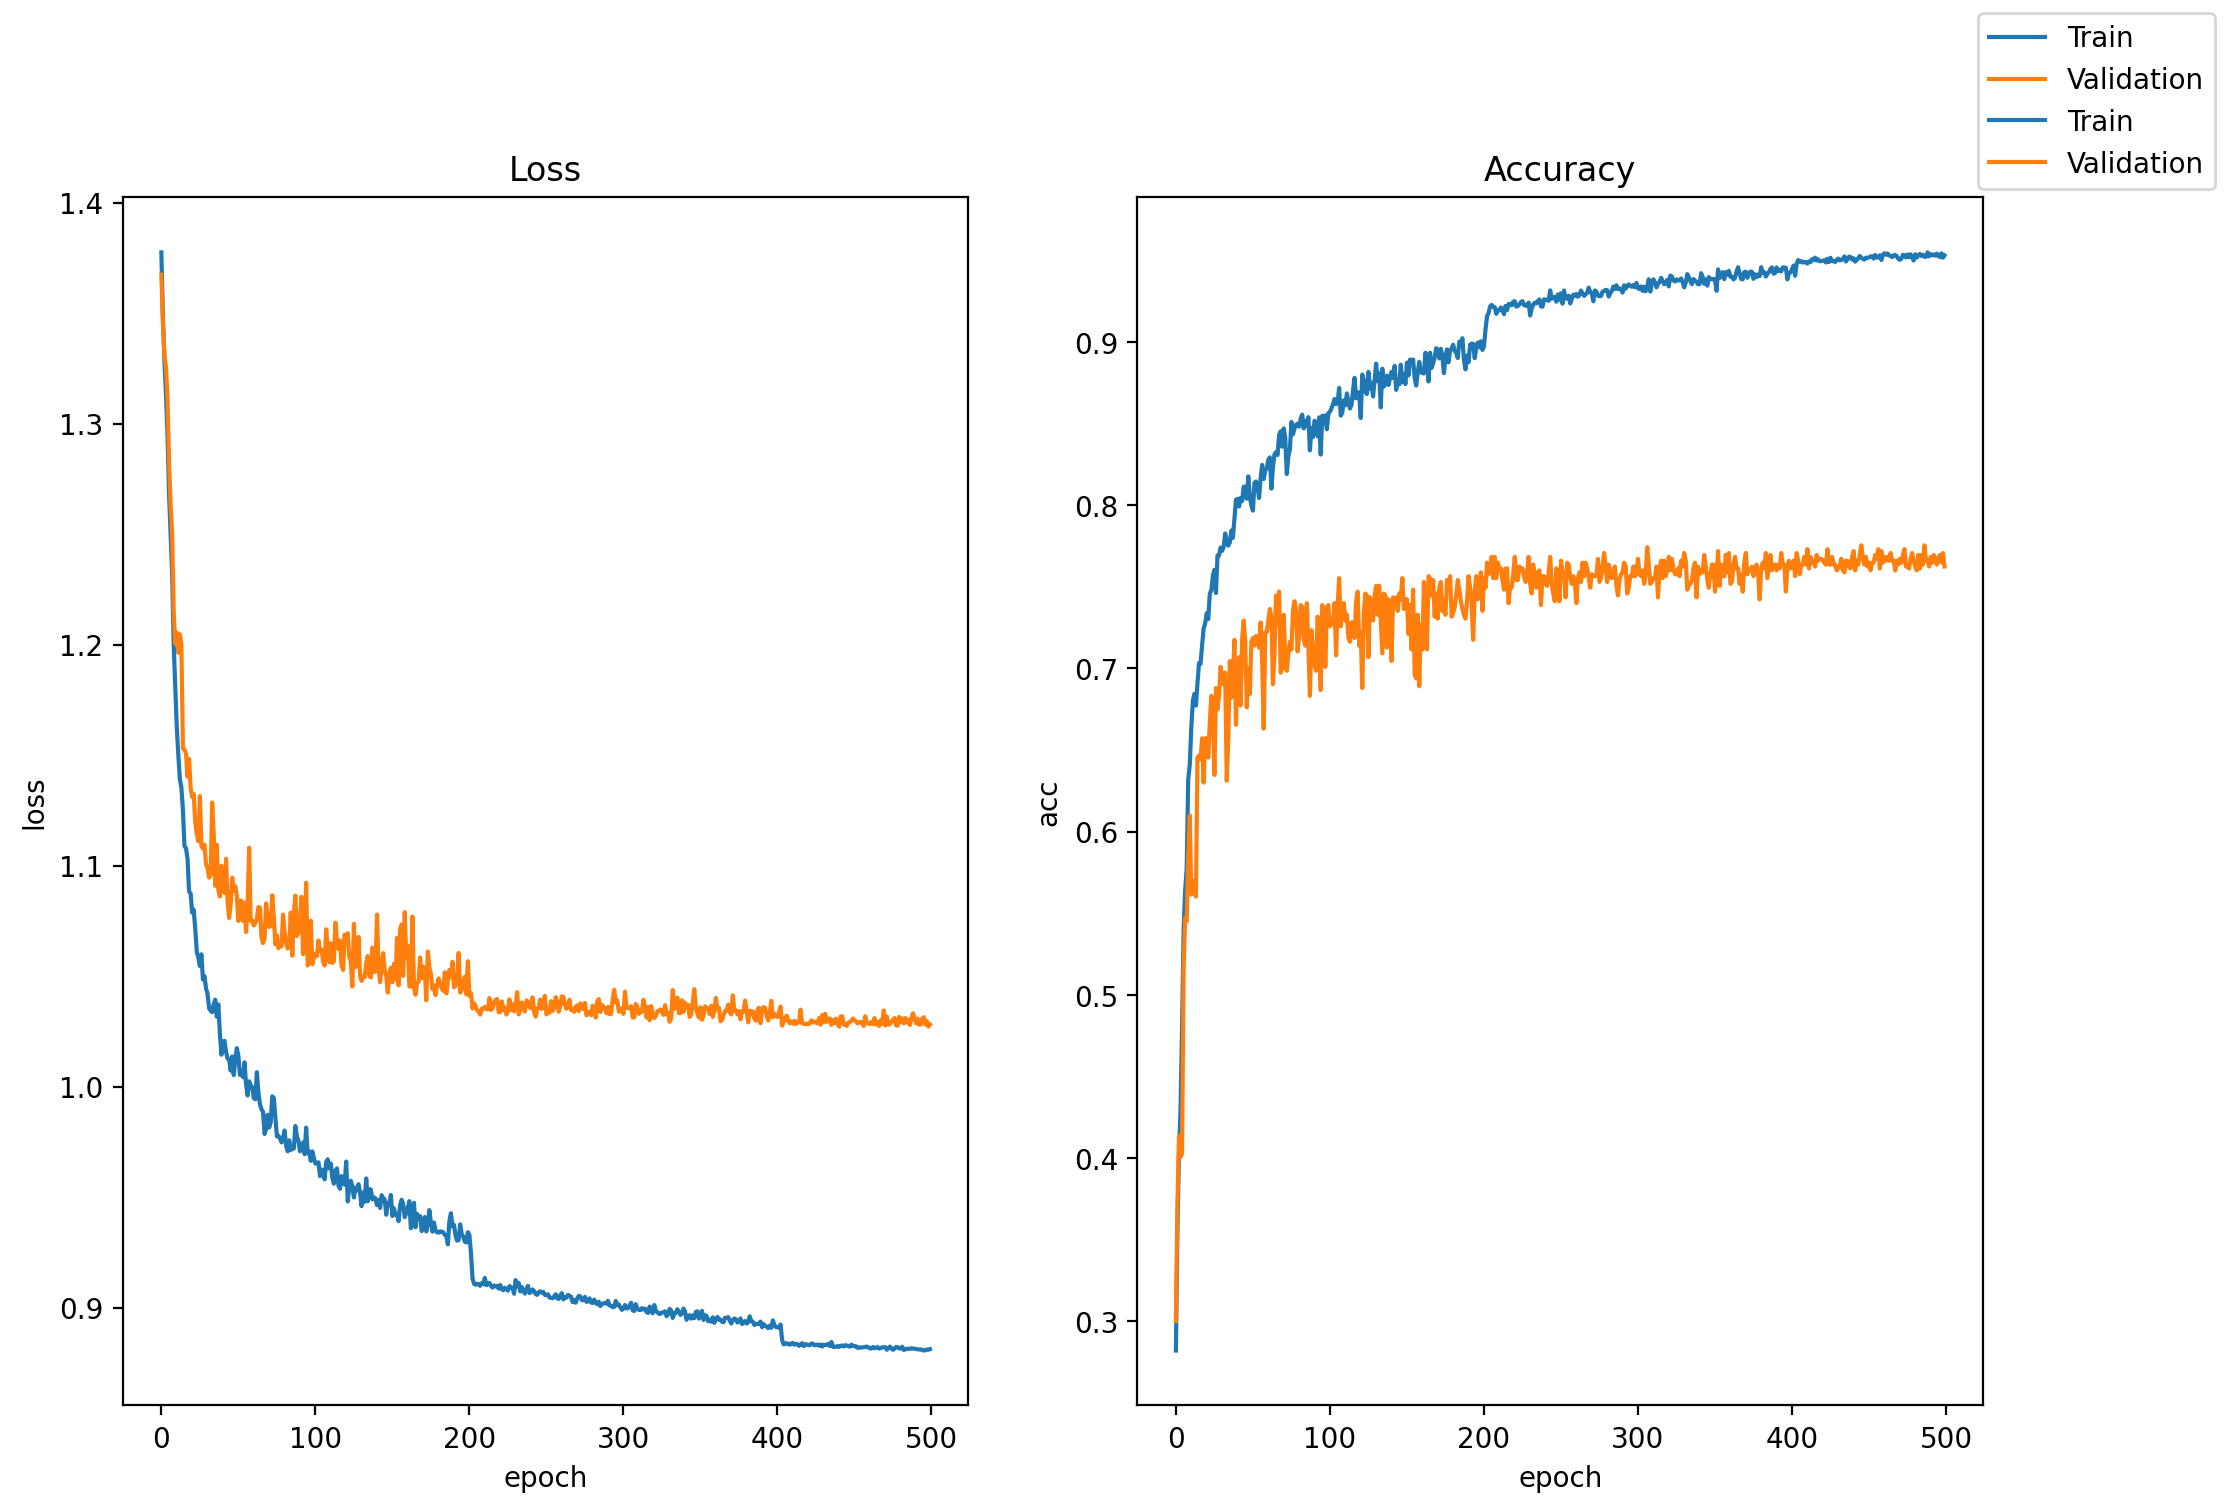

67080	0.712766	
--Iter 49	0.956464
169	0.936924	0.890077	1.074715	0.706856	
--Iter 49	0.903438
170	0.940159	0.885824	1.065721	0.699764	
--Iter 49	0.948326
171	0.934407	0.891594	1.073269	0.686761	
--Iter 49	0.943488
172	0.936209	0.896479	1.068486	0.721040	
--Iter 49	0.934207
173	0.935879	0.894163	1.069101	0.683215	
--Iter 49	0.923542
174	0.939551	0.889067	1.067361	0.695035	
--Iter 49	0.925197
175	0.935619	0.896226	1.072806	0.696217	
--Iter 49	0.976319
176	0.936895	0.888940	1.062469	0.716312	
--Iter 49	0.900153
177	0.938189	0.886919	1.066958	0.698582	
--Iter 49	0.982742
178	0.932665	0.896395	1.081129	0.695035	
--Iter 49	1.010411
179	0.931937	0.896648	1.066381	0.696217	
--Iter 49	0.952379
180	0.937661	0.891004	1.082249	0.696217	
--Iter 49	0.921615
181	0.930148	0.901575	1.058123	0.706856	
--Iter 49	0.953094
182	0.929100	0.899806	1.074340	0.708038	
--Iter 49	0.894576
183	0.933210	0.895426	1.070300	0.698582	
--Iter 49	0.904241
184	0.928659	0.901322	1.066025	0.705674	
--Iter 49	0.905318
185	0

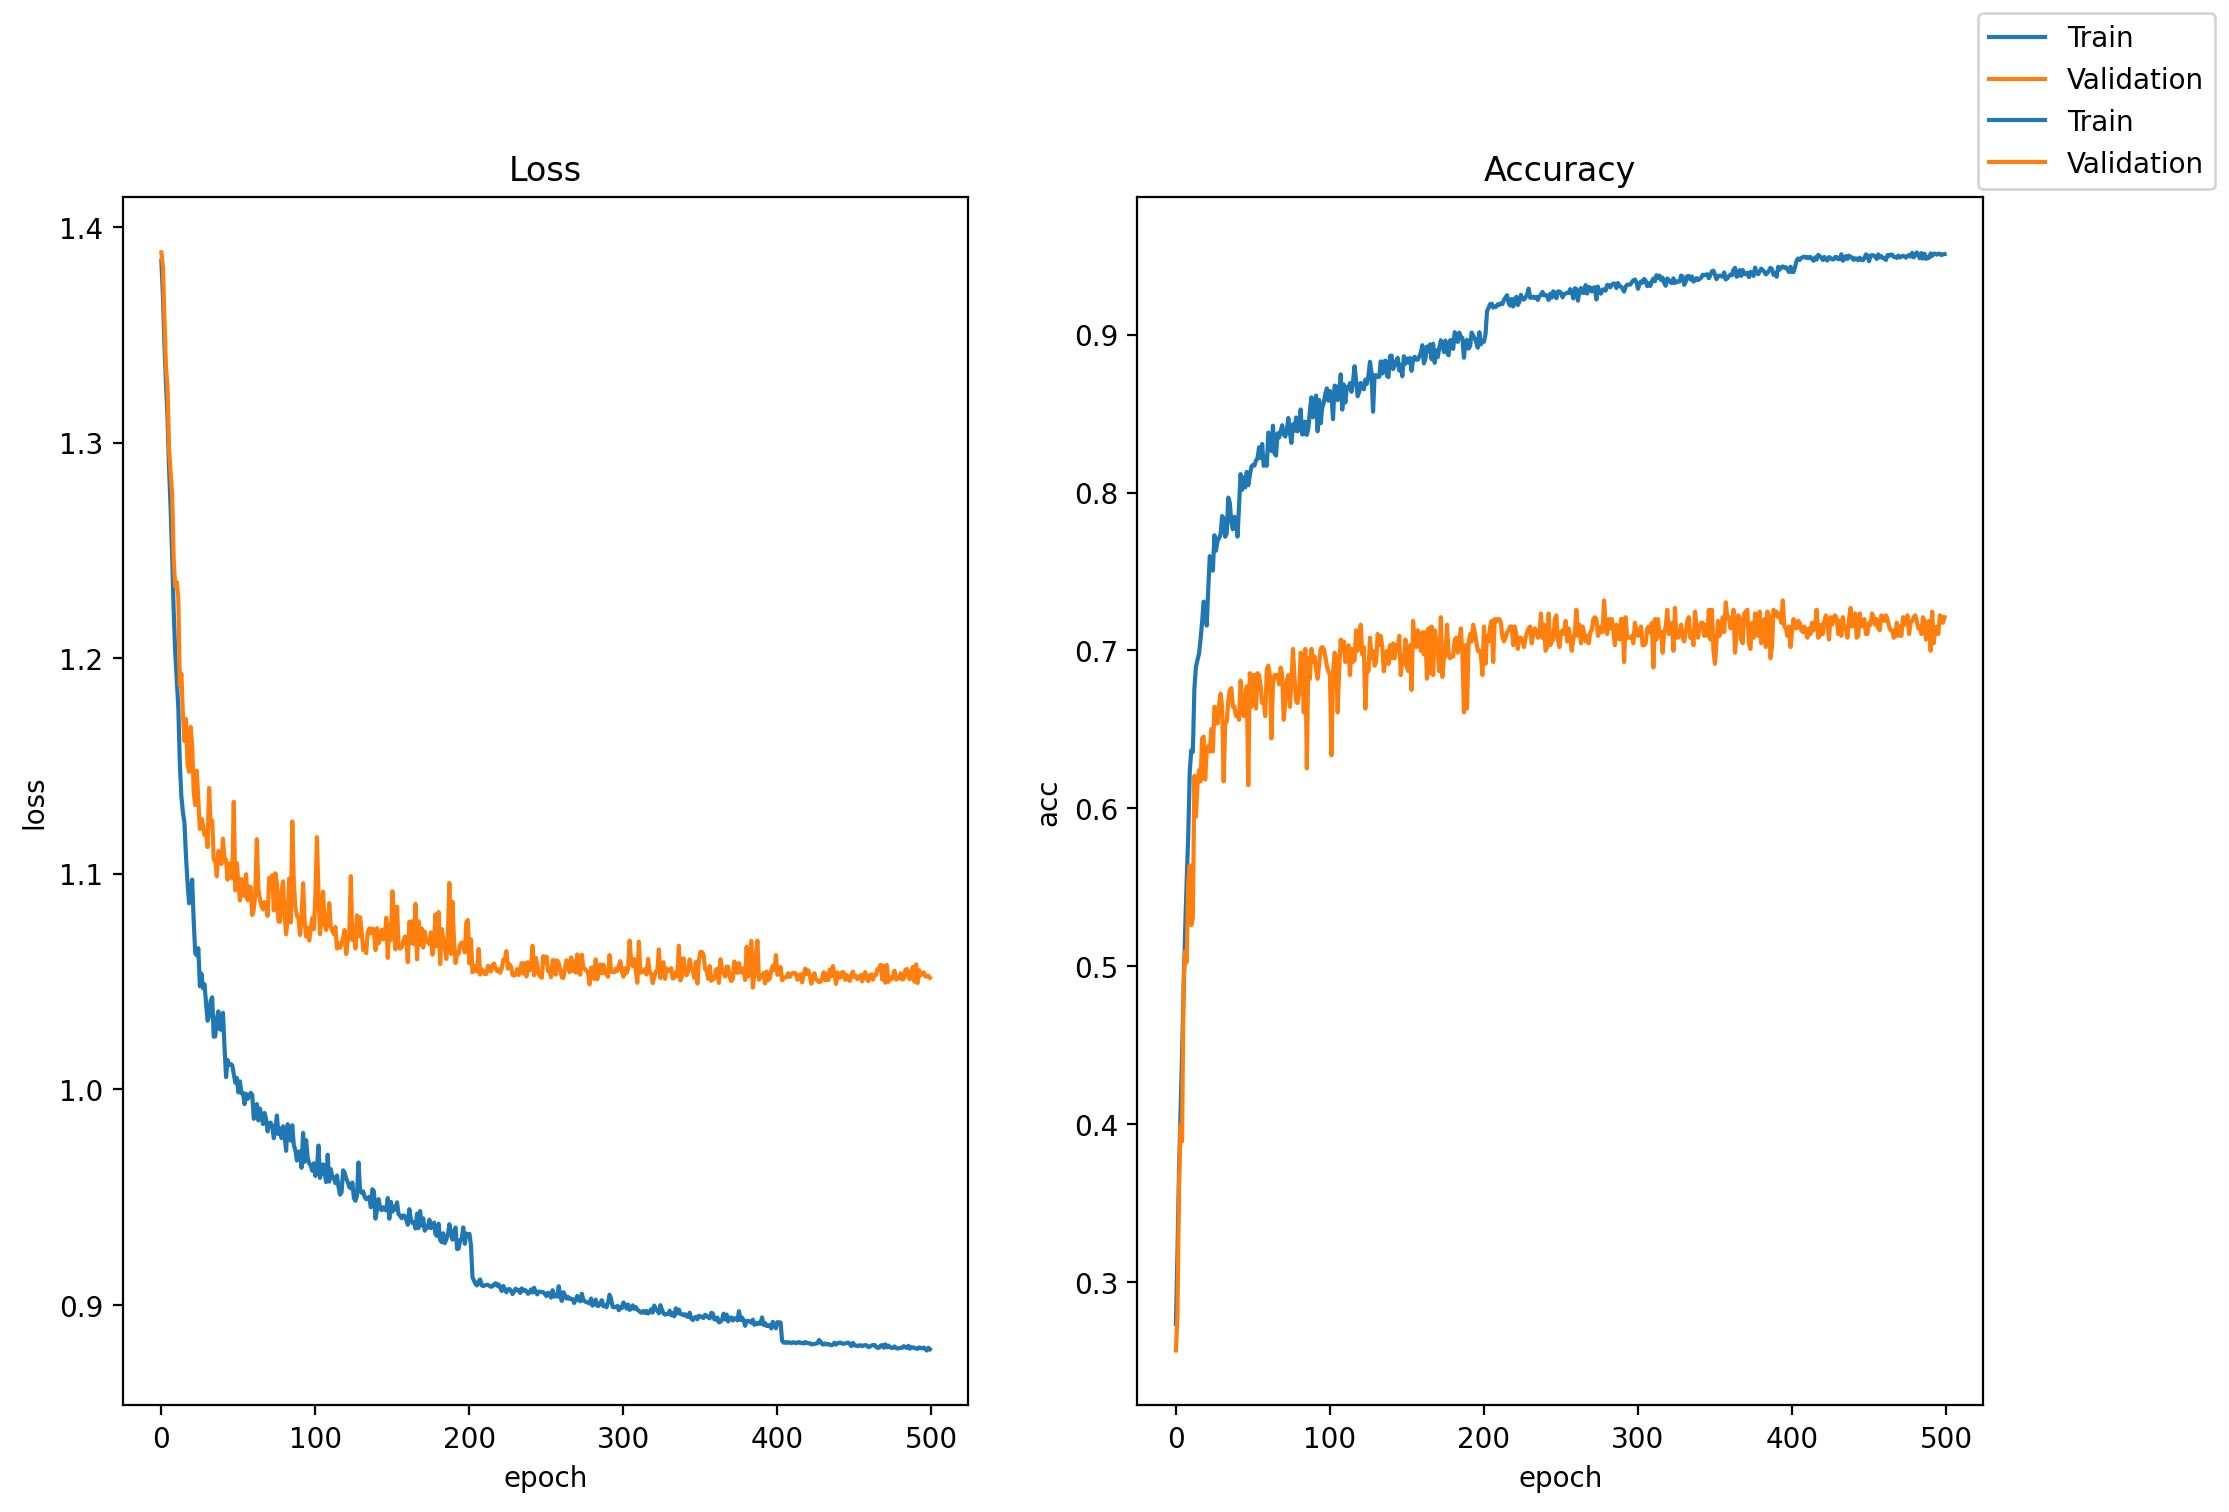

87258	0.690307	
--Iter 49	0.970826
169	0.941258	0.894163	1.082086	0.697400	
--Iter 49	0.898001
170	0.936164	0.894121	1.104955	0.647754	
--Iter 49	0.897268
171	0.936799	0.892647	1.078493	0.690307	
--Iter 49	0.926782
172	0.931720	0.896900	1.091945	0.669031	
--Iter 49	0.907998
173	0.938495	0.890709	1.091740	0.665485	
--Iter 49	0.951412
174	0.940626	0.885529	1.088586	0.684397	
--Iter 49	0.956973
175	0.938847	0.889362	1.096941	0.677305	
--Iter 49	0.900693
176	0.936648	0.891552	1.086869	0.685579	
--Iter 49	0.979650
177	0.930801	0.898880	1.077734	0.685579	
--Iter 49	0.914467
178	0.932127	0.895932	1.085611	0.680851	
--Iter 49	0.888574
179	0.937817	0.896942	1.098942	0.667849	
--Iter 49	0.899313
180	0.937883	0.887635	1.079487	0.702128	
--Iter 49	0.964199
181	0.931897	0.900522	1.095547	0.666667	
--Iter 49	0.946918
182	0.932989	0.901028	1.086586	0.679669	
--Iter 49	0.923144
183	0.931209	0.898543	1.084260	0.692671	
--Iter 49	0.927638
184	0.937229	0.896816	1.079115	0.693853	
--Iter 49	0.978536
185	0

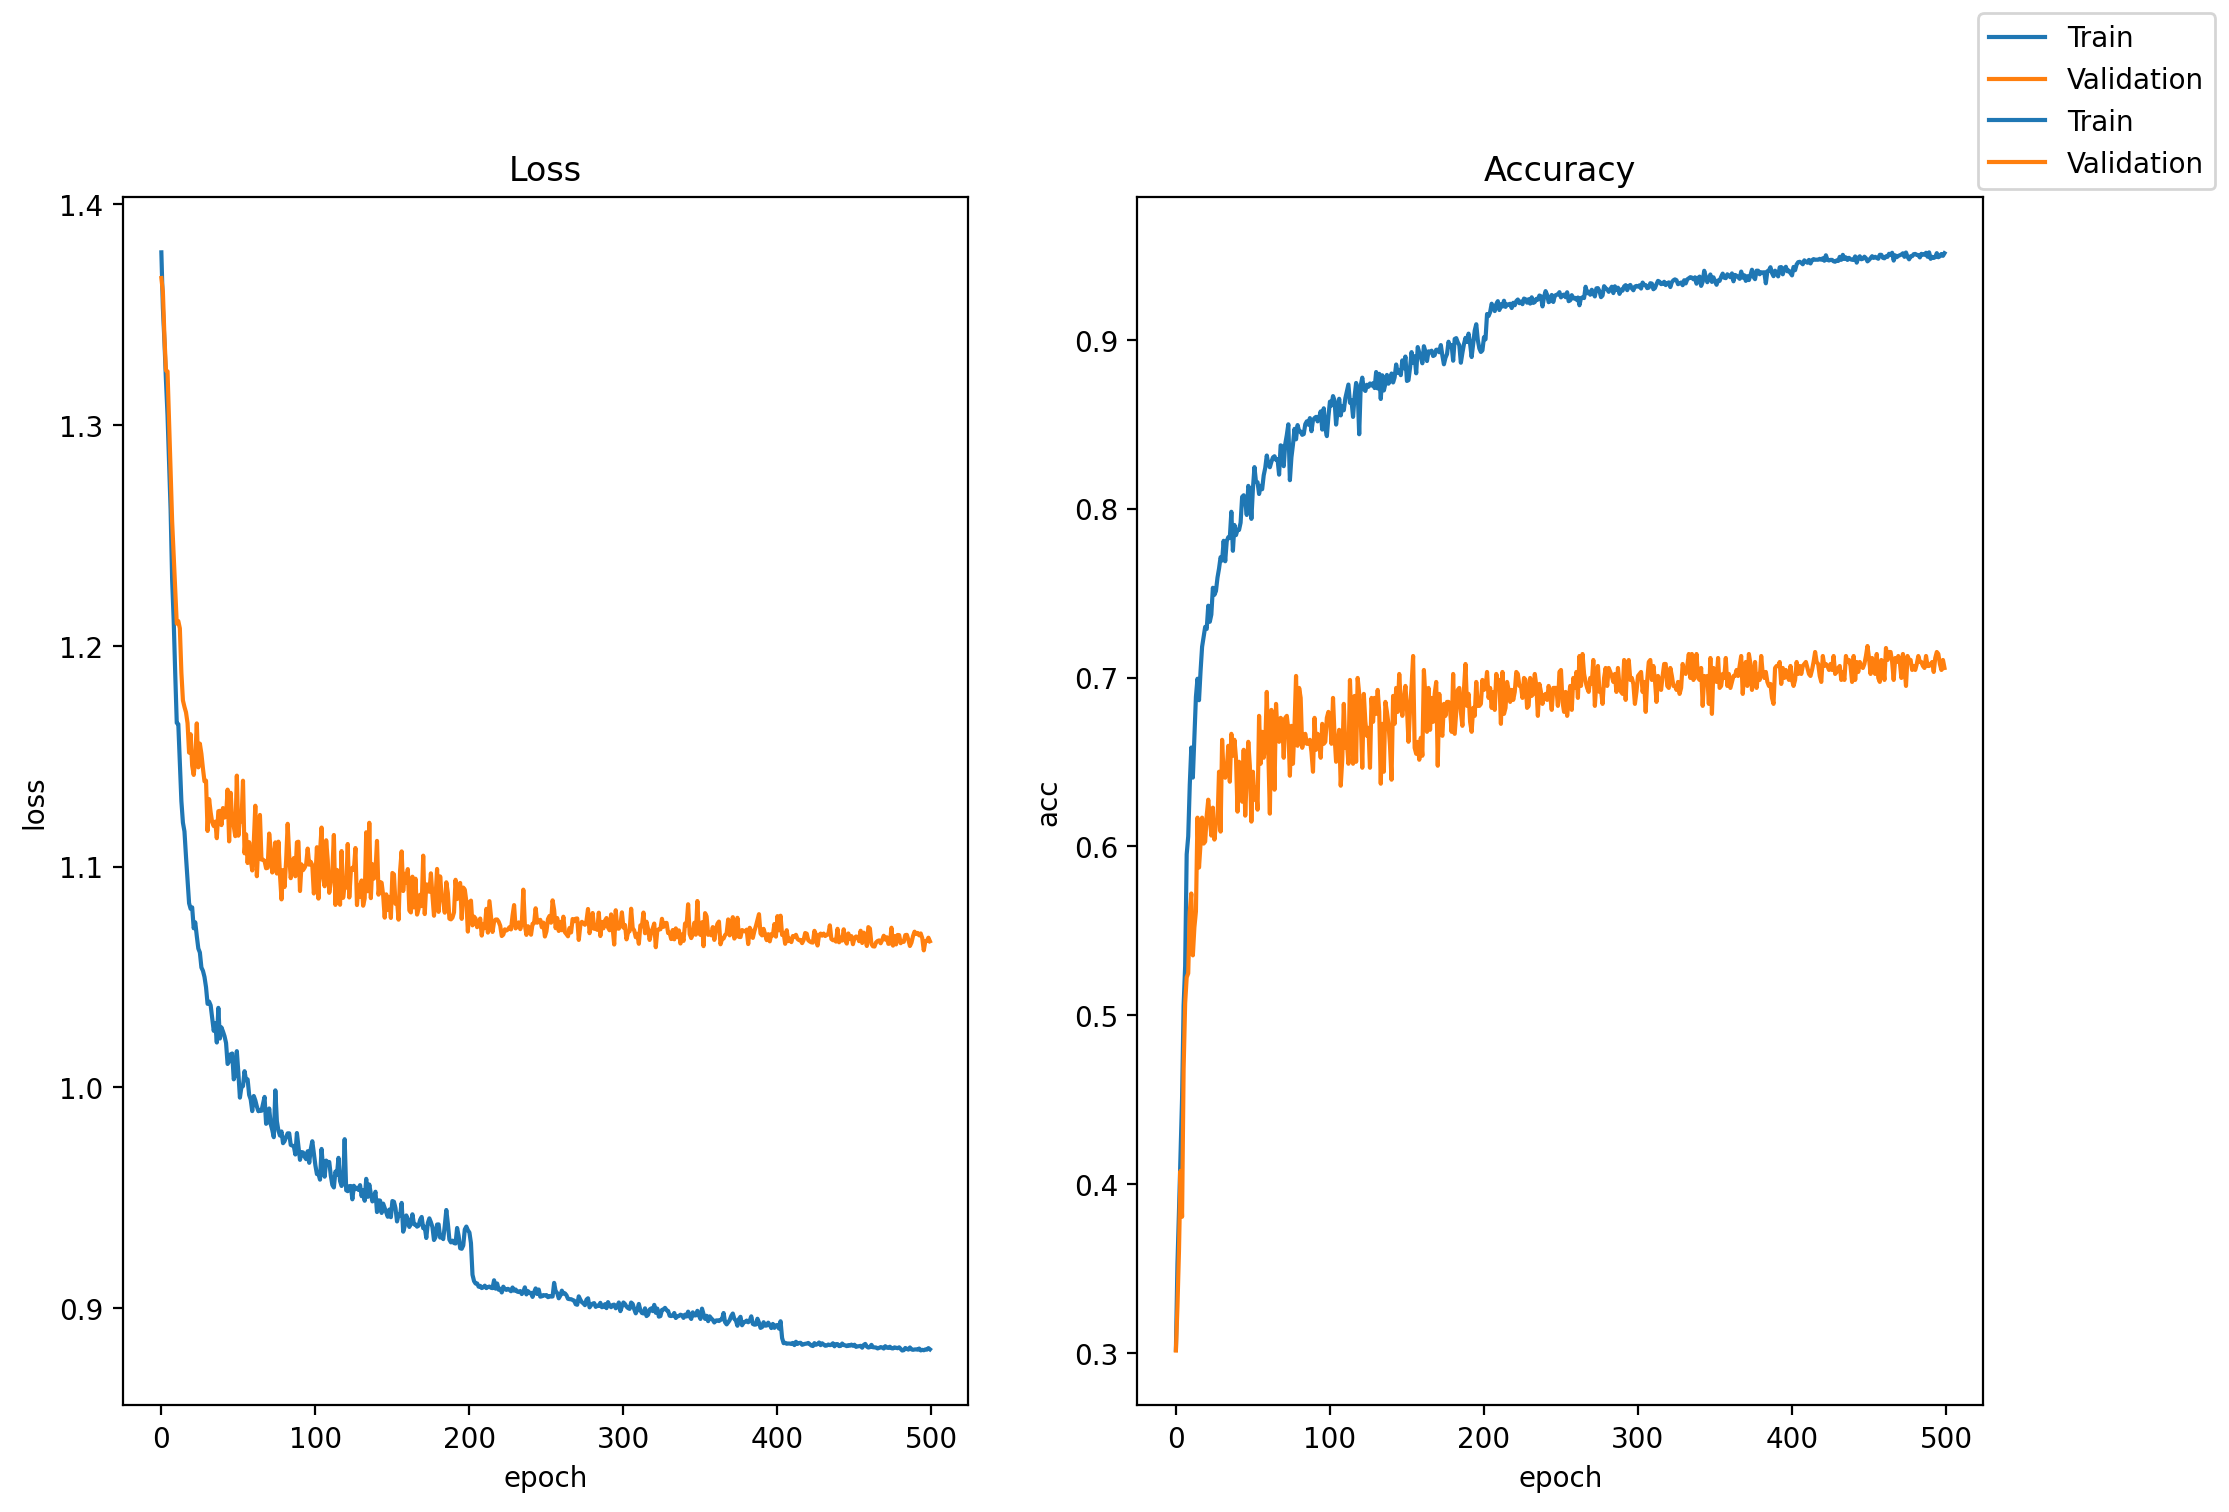

46419	0.739953	
--Iter 49	1.027489
169	0.938650	0.886666	1.051522	0.737589	
--Iter 49	0.887323
170	0.946407	0.881865	1.064213	0.715130	
--Iter 49	0.958846
171	0.949509	0.873063	1.060578	0.721040	
--Iter 49	0.923454
172	0.944615	0.879675	1.049115	0.732861	
--Iter 49	0.918984
173	0.941682	0.879801	1.058519	0.730496	
--Iter 49	0.906468
174	0.943163	0.877990	1.064472	0.703310	
--Iter 49	0.972174
175	0.950315	0.873947	1.078368	0.702128	
--Iter 49	0.925433
176	0.945476	0.880264	1.067339	0.706856	
--Iter 49	0.912268
177	0.950943	0.869736	1.052703	0.730496	
--Iter 49	0.909824
178	0.938886	0.886792	1.060812	0.718676	
--Iter 49	0.954480
179	0.939761	0.883465	1.064079	0.716312	
--Iter 49	0.908266
180	0.942496	0.883802	1.056456	0.741135	
--Iter 49	0.912964
181	0.949878	0.869988	1.060626	0.706856	
--Iter 49	0.957190
182	0.937921	0.892057	1.061214	0.723404	
--Iter 49	0.943357
183	0.946306	0.878580	1.063016	0.703310	
--Iter 49	0.955616
184	0.950503	0.871462	1.066920	0.717494	
--Iter 49	0.967435
185	0

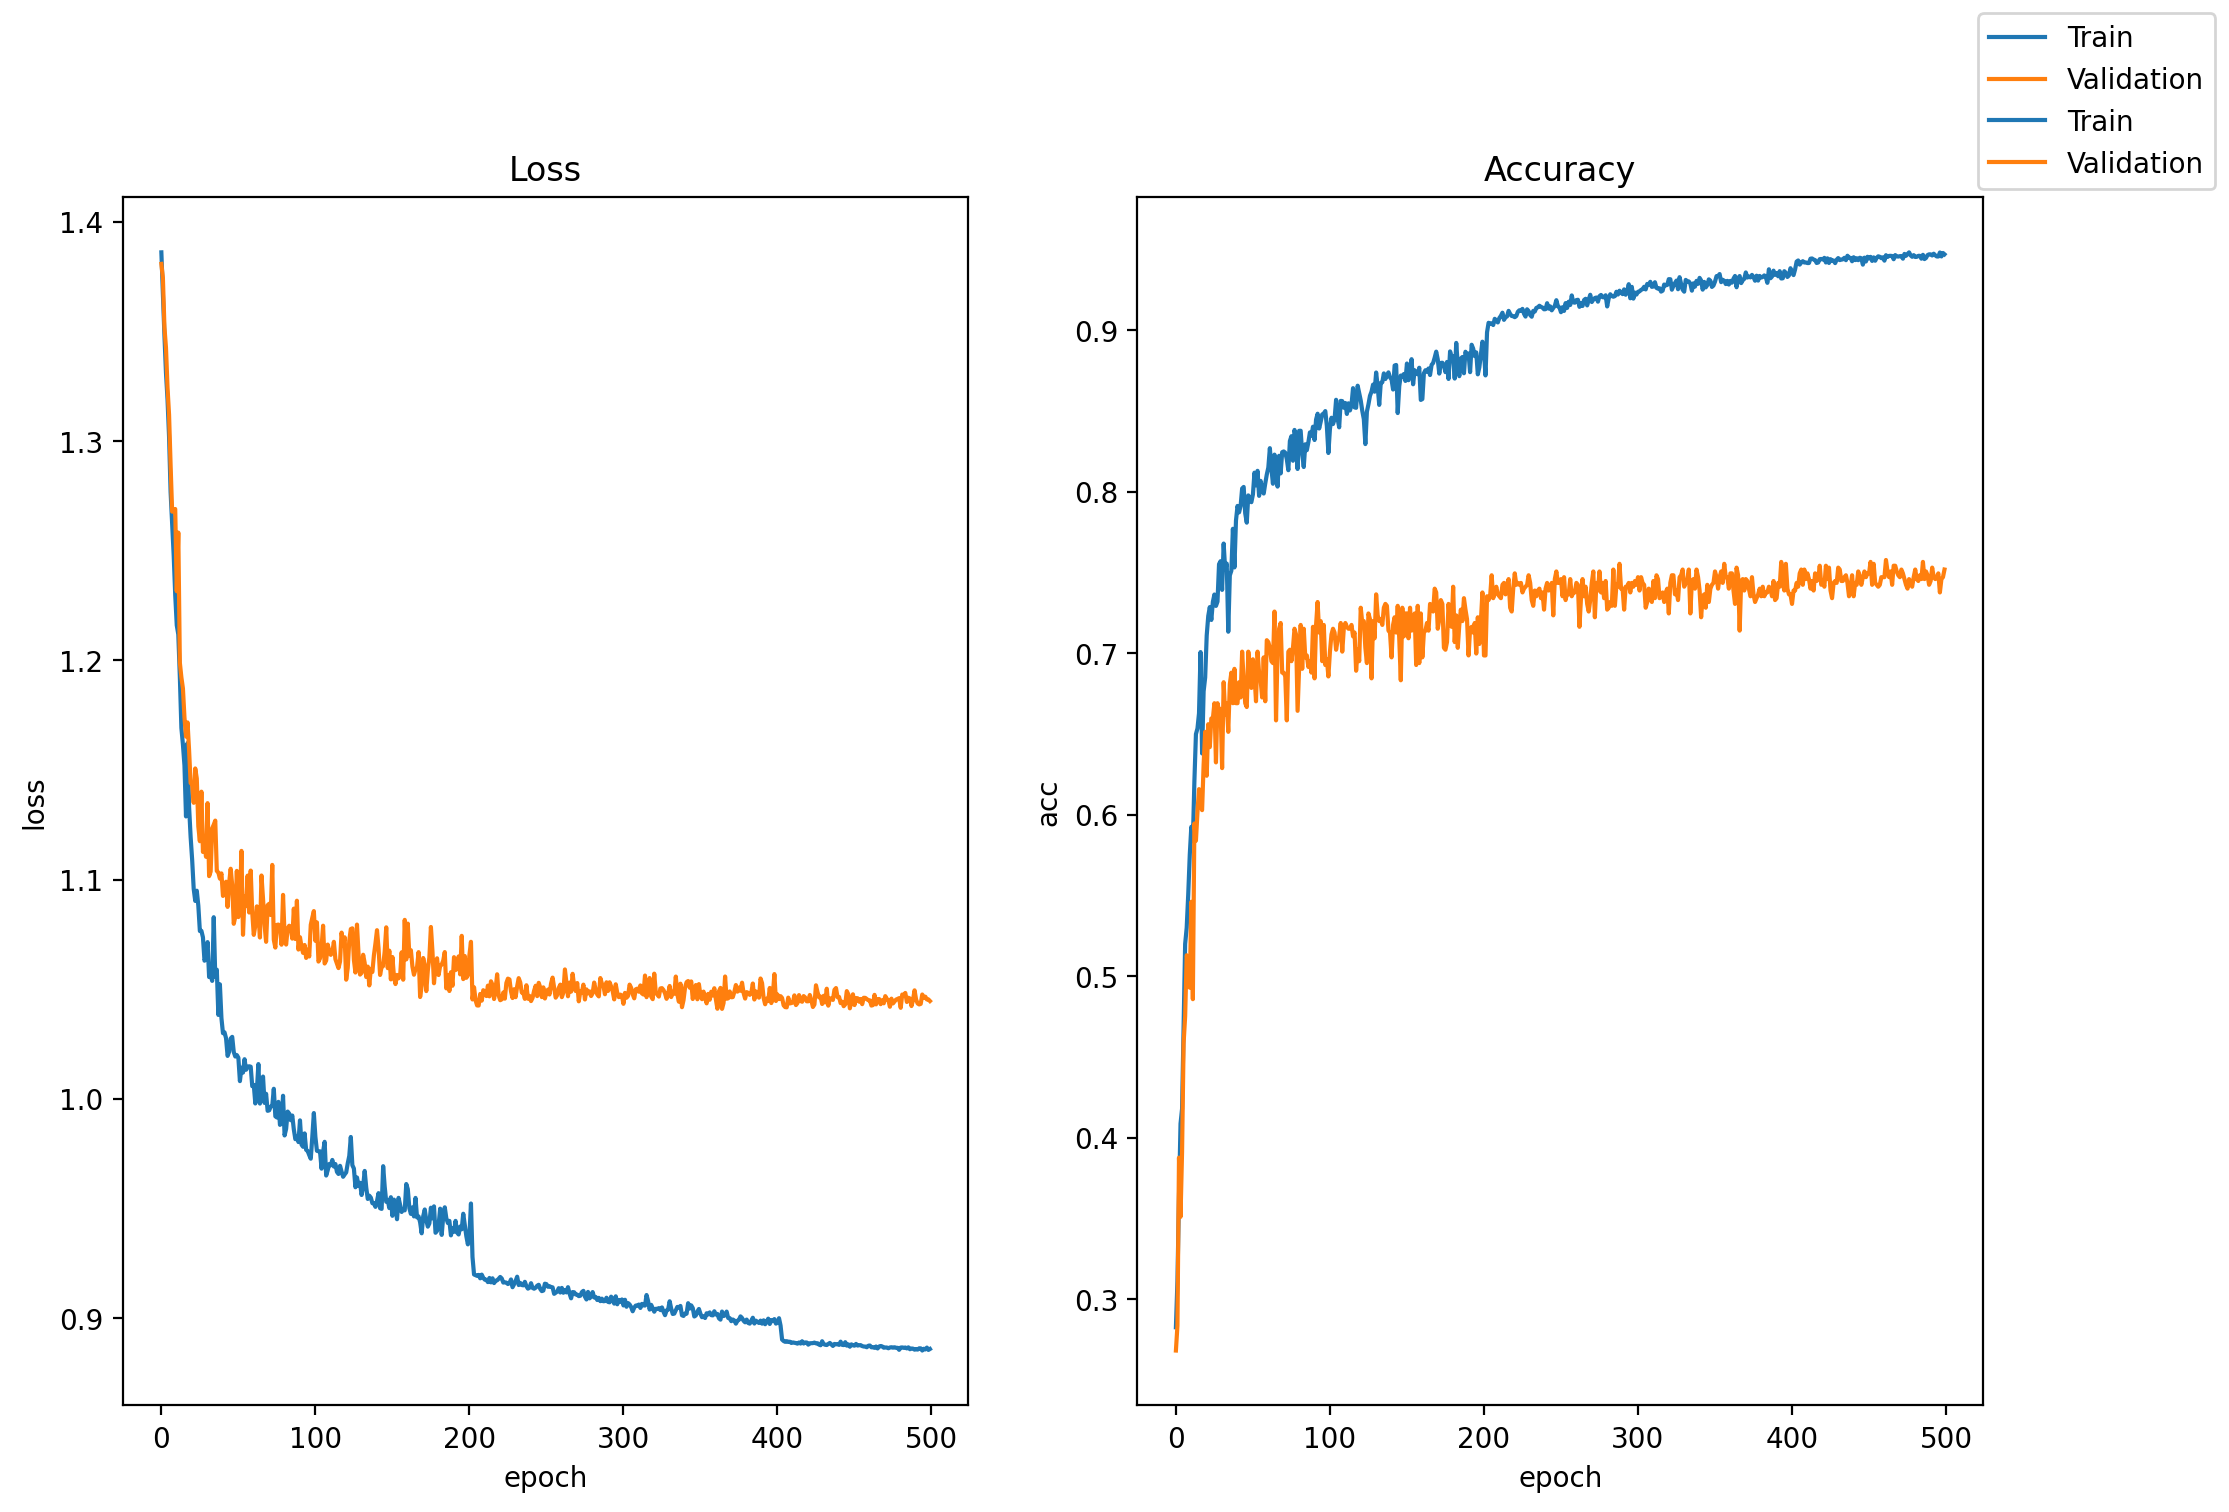

43829	0.739953	
--Iter 49	0.936166
169	0.941617	0.889741	1.042759	0.743499	
--Iter 49	0.922454
170	0.942512	0.891636	1.047625	0.730496	
--Iter 49	0.929189
171	0.939242	0.894289	1.037107	0.745863	
--Iter 49	0.905528
172	0.941310	0.888393	1.057710	0.721040	
--Iter 49	0.966853
173	0.944701	0.887214	1.060795	0.719858	
--Iter 49	0.911996
174	0.945307	0.877653	1.045663	0.732861	
--Iter 49	0.951672
175	0.940811	0.884350	1.043101	0.739953	
--Iter 49	0.962507
176	0.937857	0.893615	1.049908	0.737589	
--Iter 49	0.946247
177	0.934833	0.893952	1.038116	0.748227	
--Iter 49	0.895118
178	0.931165	0.900522	1.045911	0.734043	
--Iter 49	0.917339
179	0.933322	0.896311	1.057578	0.718676	
--Iter 49	0.940889
180	0.937874	0.890878	1.043030	0.732861	
--Iter 49	0.947912
181	0.935182	0.895932	1.041767	0.754137	
--Iter 49	0.960631
182	0.941781	0.888098	1.041020	0.749409	
--Iter 49	0.985262
183	0.940620	0.891173	1.043758	0.750591	
--Iter 49	0.935453
184	0.940487	0.885655	1.043054	0.744681	
--Iter 49	0.927167
185	0

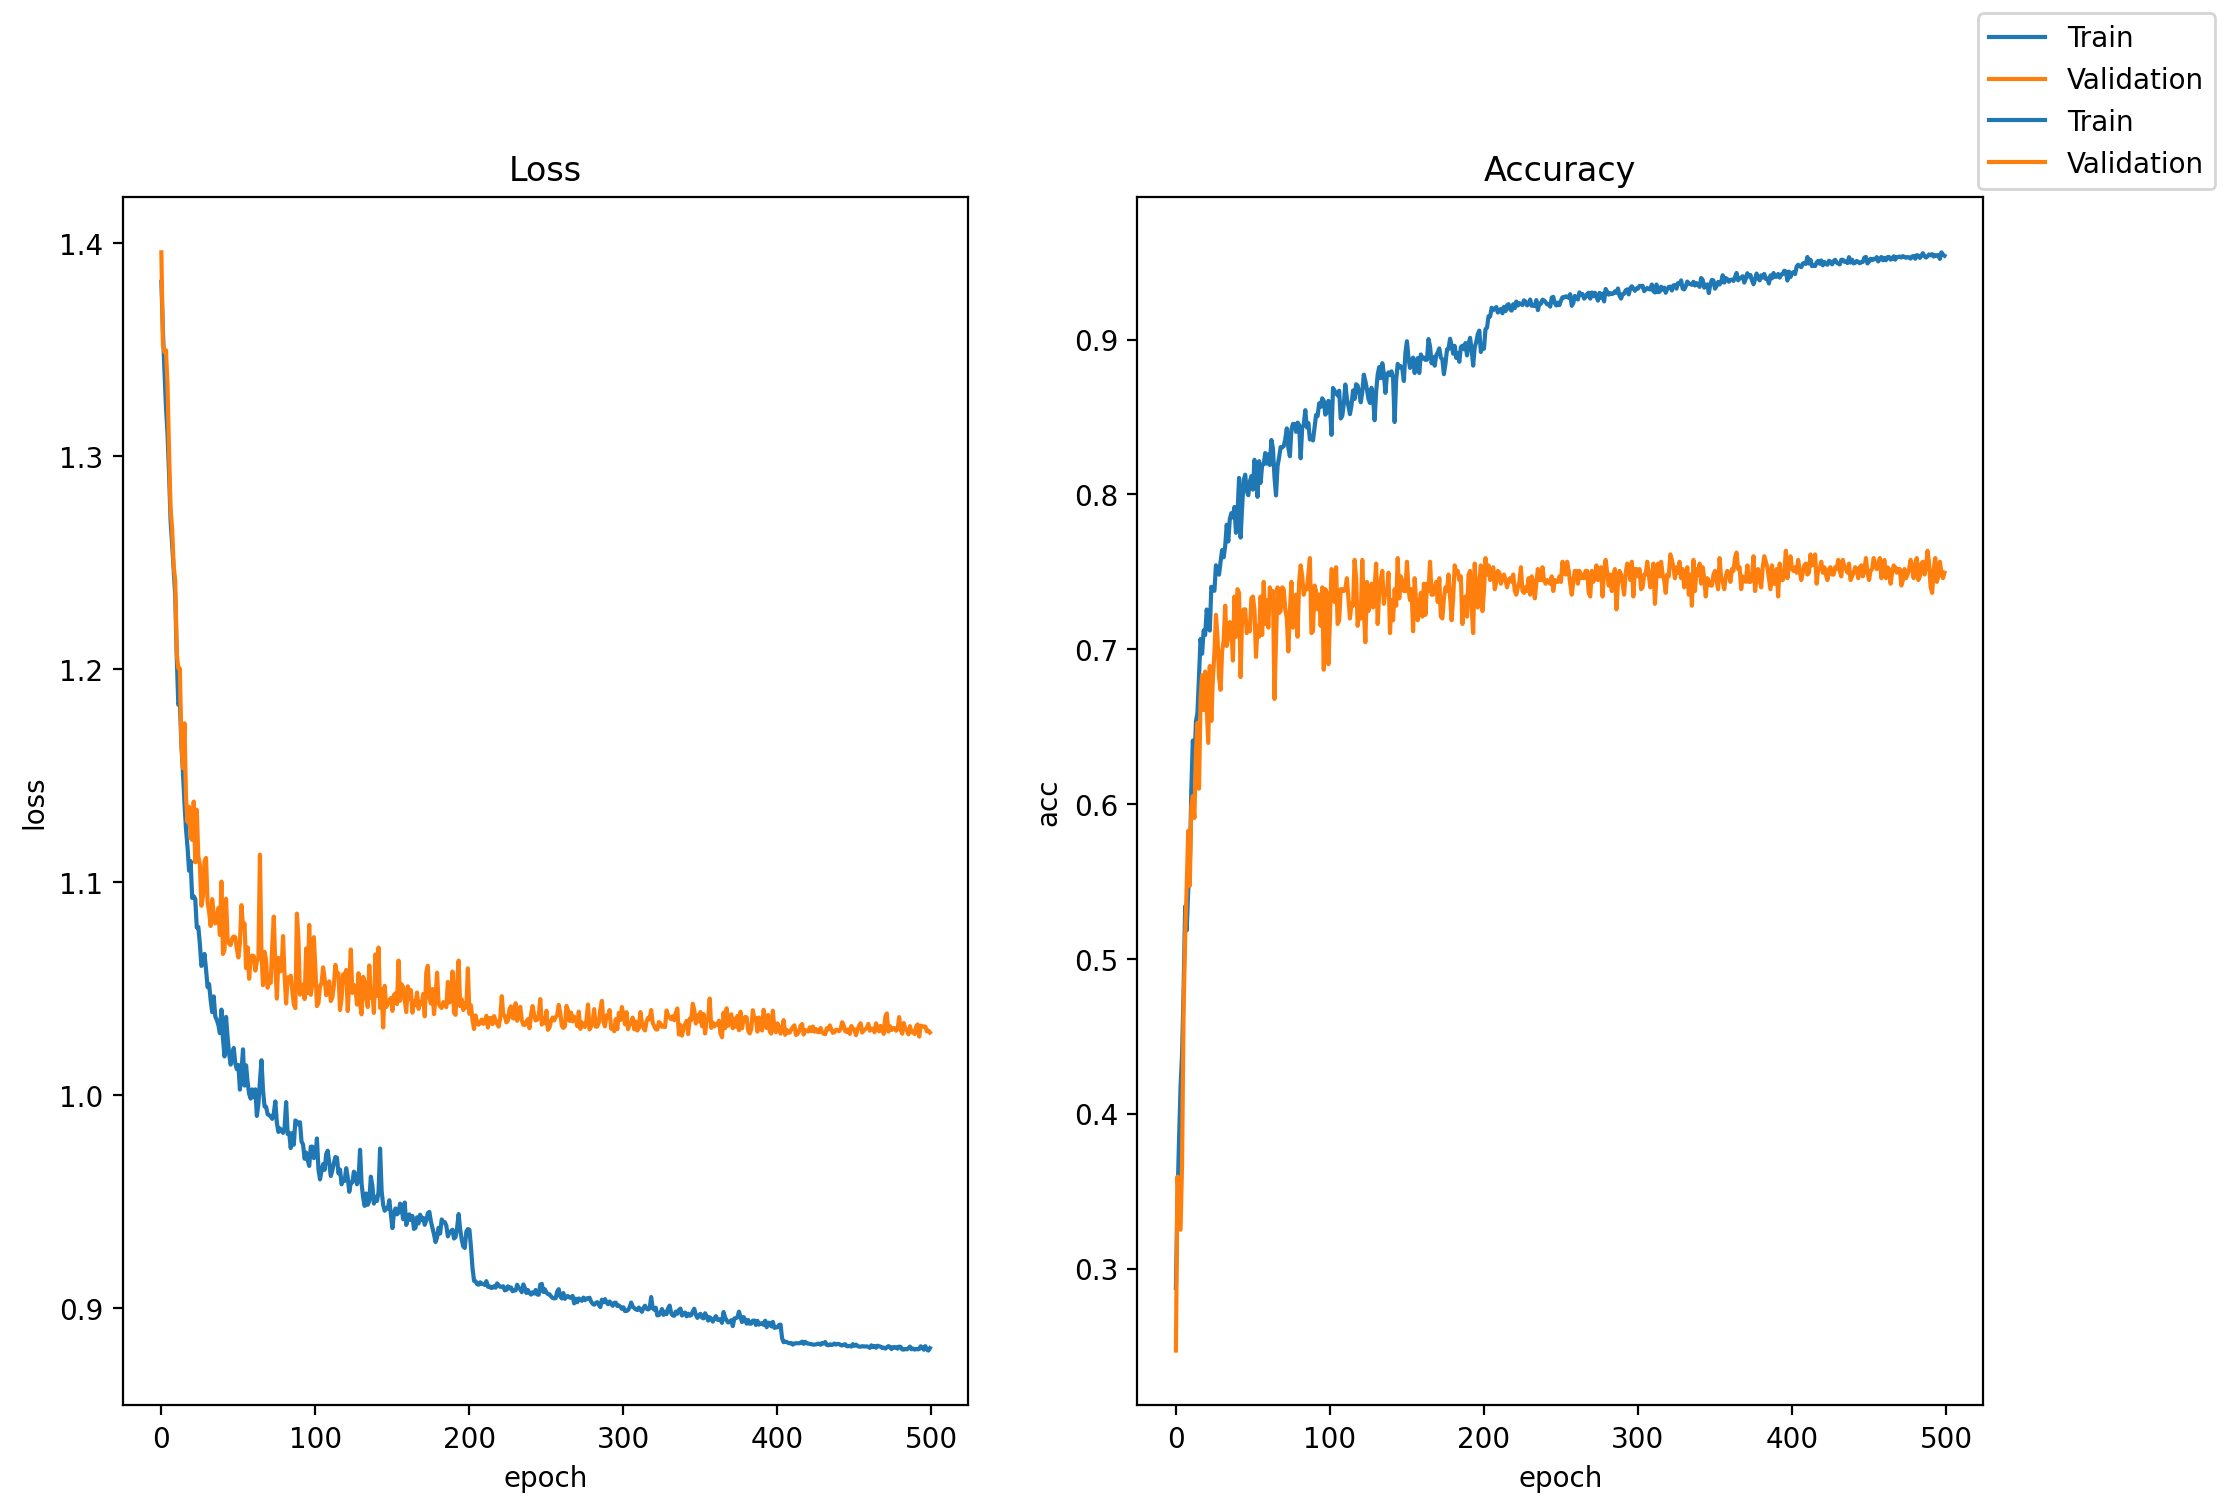

41733	0.754137	
--Iter 49	0.911659
169	0.940567	0.889825	1.044829	0.738771	
--Iter 49	0.905845
170	0.935953	0.891888	1.048731	0.749409	
--Iter 49	1.006404
171	0.939209	0.895426	1.050600	0.728132	
--Iter 49	0.935410
172	0.941093	0.889488	1.042309	0.736407	
--Iter 49	0.993089
173	0.941965	0.883170	1.040546	0.743499	
--Iter 49	0.892730
174	0.937781	0.895468	1.055861	0.731678	
--Iter 49	0.971804
175	0.940643	0.889783	1.051280	0.747045	
--Iter 49	0.959872
176	0.943430	0.890962	1.042893	0.741135	
--Iter 49	0.907638
177	0.933146	0.900270	1.062200	0.735225	
--Iter 49	0.900827
178	0.939396	0.890204	1.040281	0.761229	
--Iter 49	0.924202
179	0.936933	0.890246	1.045431	0.744681	
--Iter 49	0.936587
180	0.938861	0.896816	1.051087	0.731678	
--Iter 49	0.946244
181	0.942539	0.887087	1.038199	0.760047	
--Iter 49	0.903827
182	0.937131	0.892983	1.042081	0.741135	
--Iter 49	0.936684
183	0.936932	0.892141	1.048966	0.747045	
--Iter 49	0.929170
184	0.936182	0.896521	1.040794	0.754137	
--Iter 49	0.961238
185	0

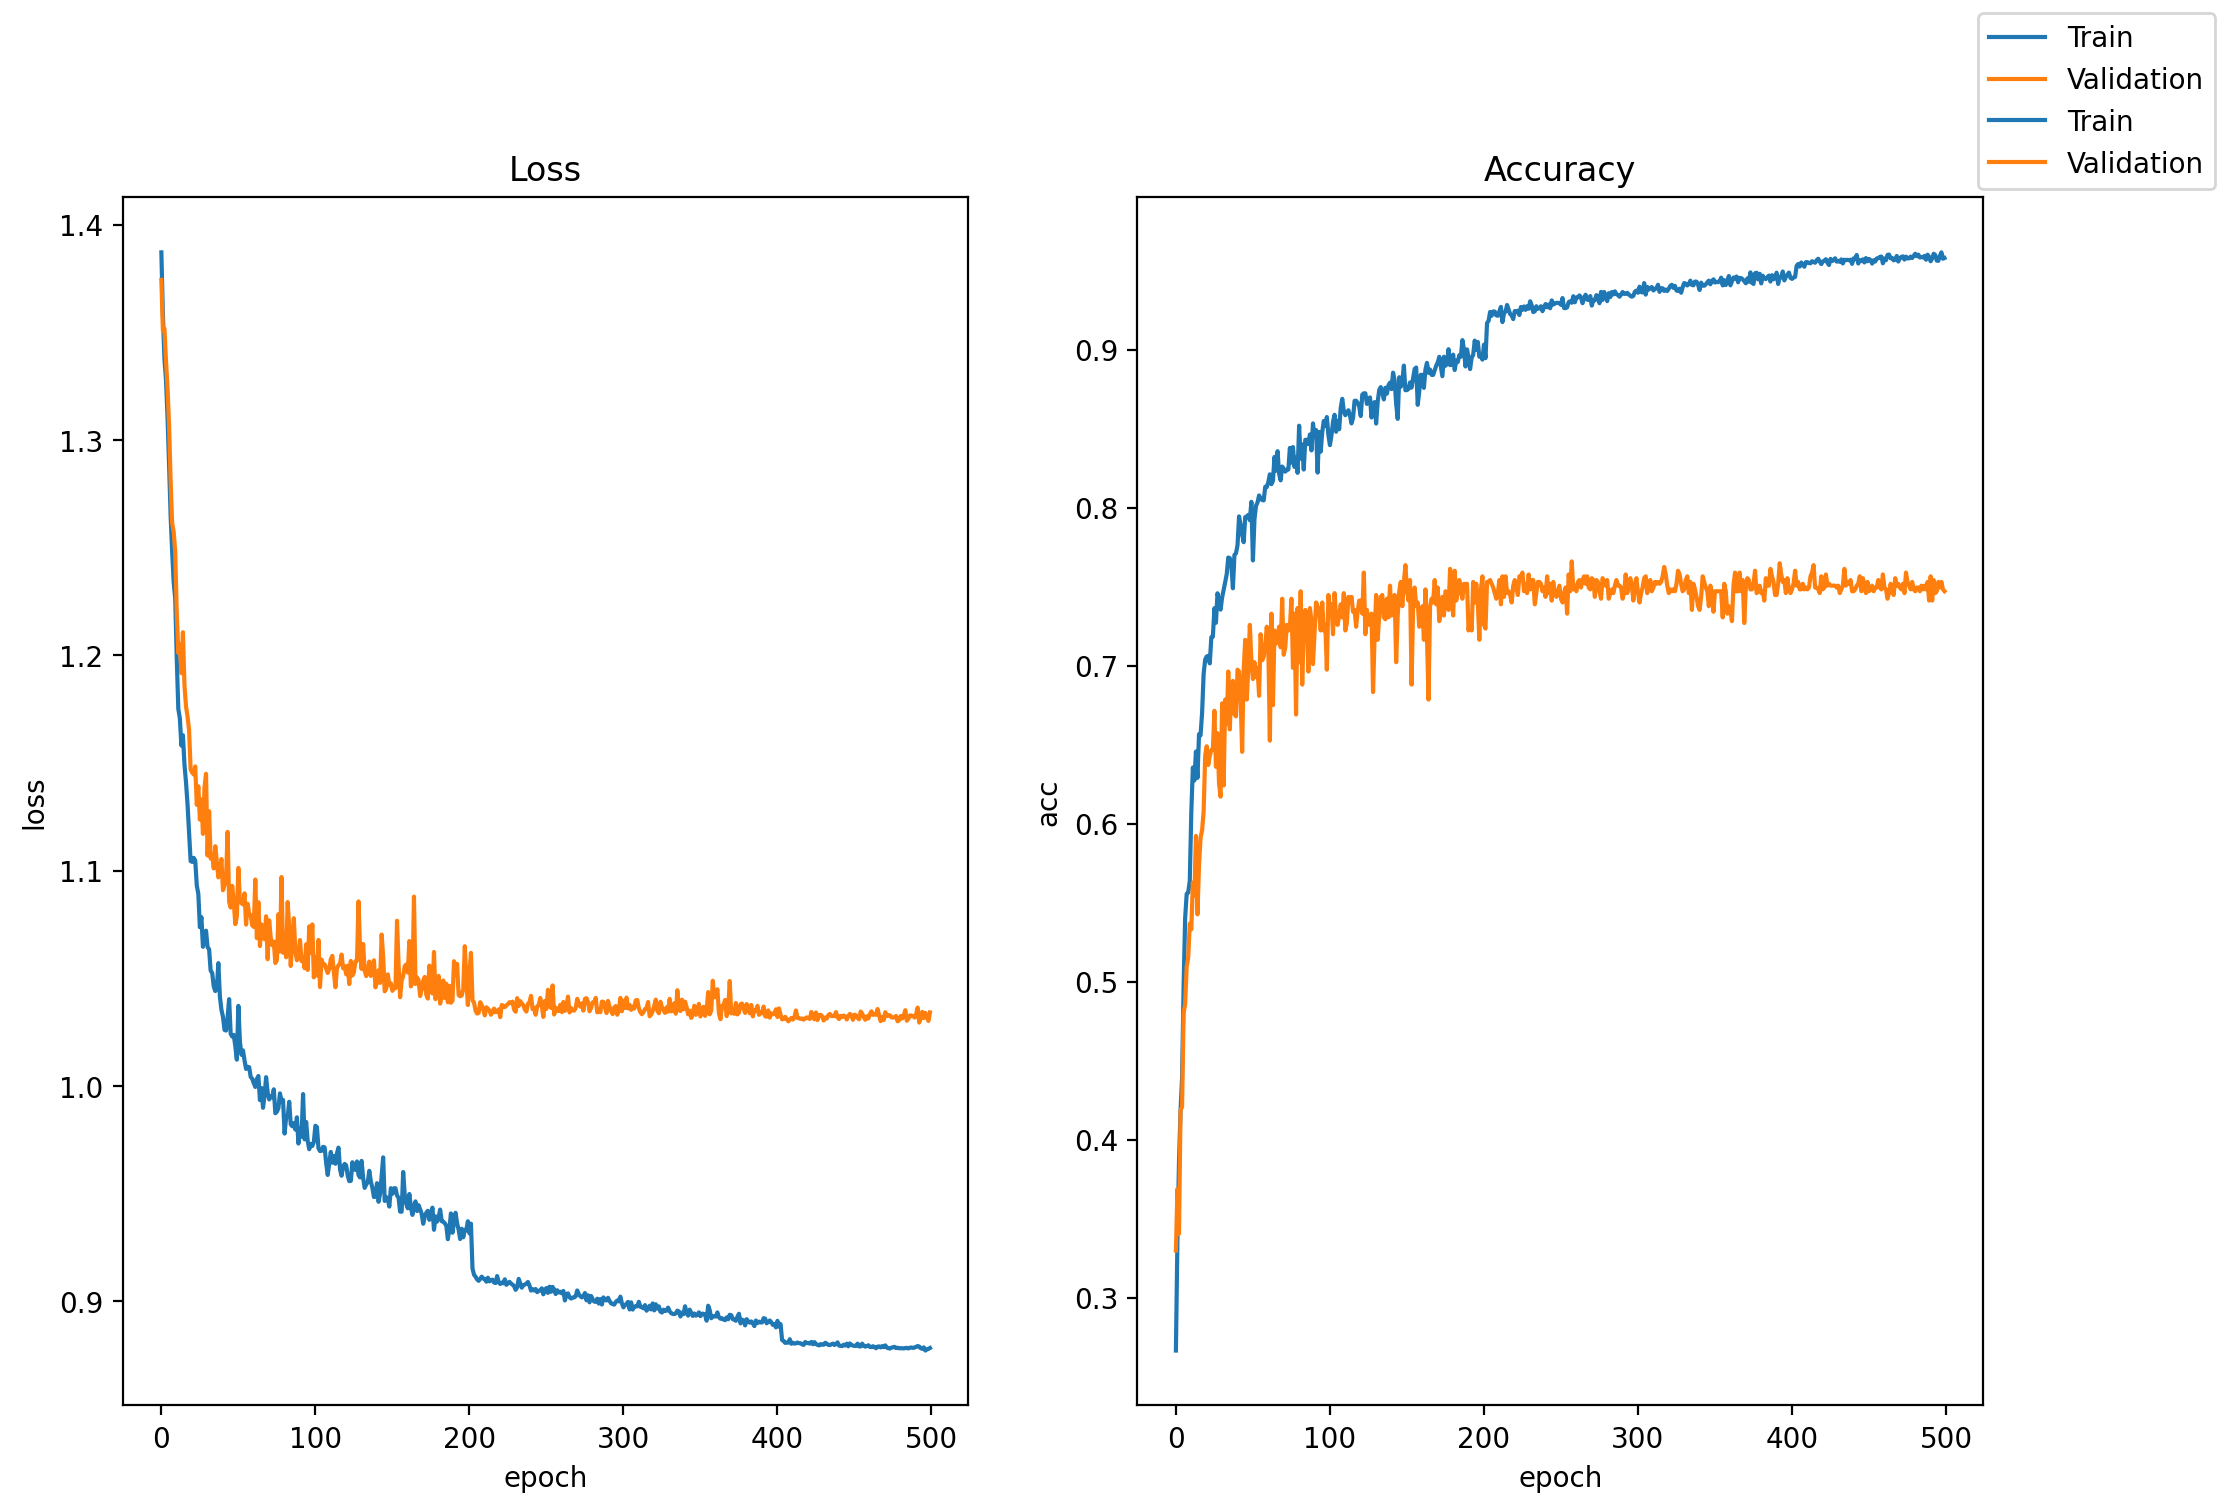

74487	0.698582	
--Iter 49	0.956844
169	0.946007	0.880896	1.062997	0.736407	
--Iter 49	0.925637
170	0.936725	0.889277	1.064891	0.716312	
--Iter 49	0.941520
171	0.933726	0.894584	1.063392	0.730496	
--Iter 49	0.955855
172	0.939516	0.885361	1.078249	0.700946	
--Iter 49	0.996482
173	0.943443	0.877653	1.068734	0.708038	
--Iter 49	0.899169
174	0.935573	0.892352	1.061755	0.726950	
--Iter 49	0.946302
175	0.937767	0.886540	1.071786	0.698582	
--Iter 49	0.959139
176	0.936121	0.890920	1.071031	0.702128	
--Iter 49	0.945740
177	0.948456	0.872052	1.090565	0.680851	
--Iter 49	0.958789
178	0.937343	0.893405	1.073941	0.702128	
--Iter 49	0.938737
179	0.933242	0.891299	1.063764	0.721040	
--Iter 49	0.939203
180	0.929424	0.897953	1.070005	0.717494	
--Iter 49	0.944407
181	0.933742	0.895384	1.070392	0.704492	
--Iter 49	0.931521
182	0.929903	0.894837	1.079062	0.713948	
--Iter 49	0.954937
183	0.928863	0.903470	1.068573	0.711584	
--Iter 49	0.955441
184	0.939078	0.887171	1.066543	0.723404	
--Iter 49	0.957725
185	0

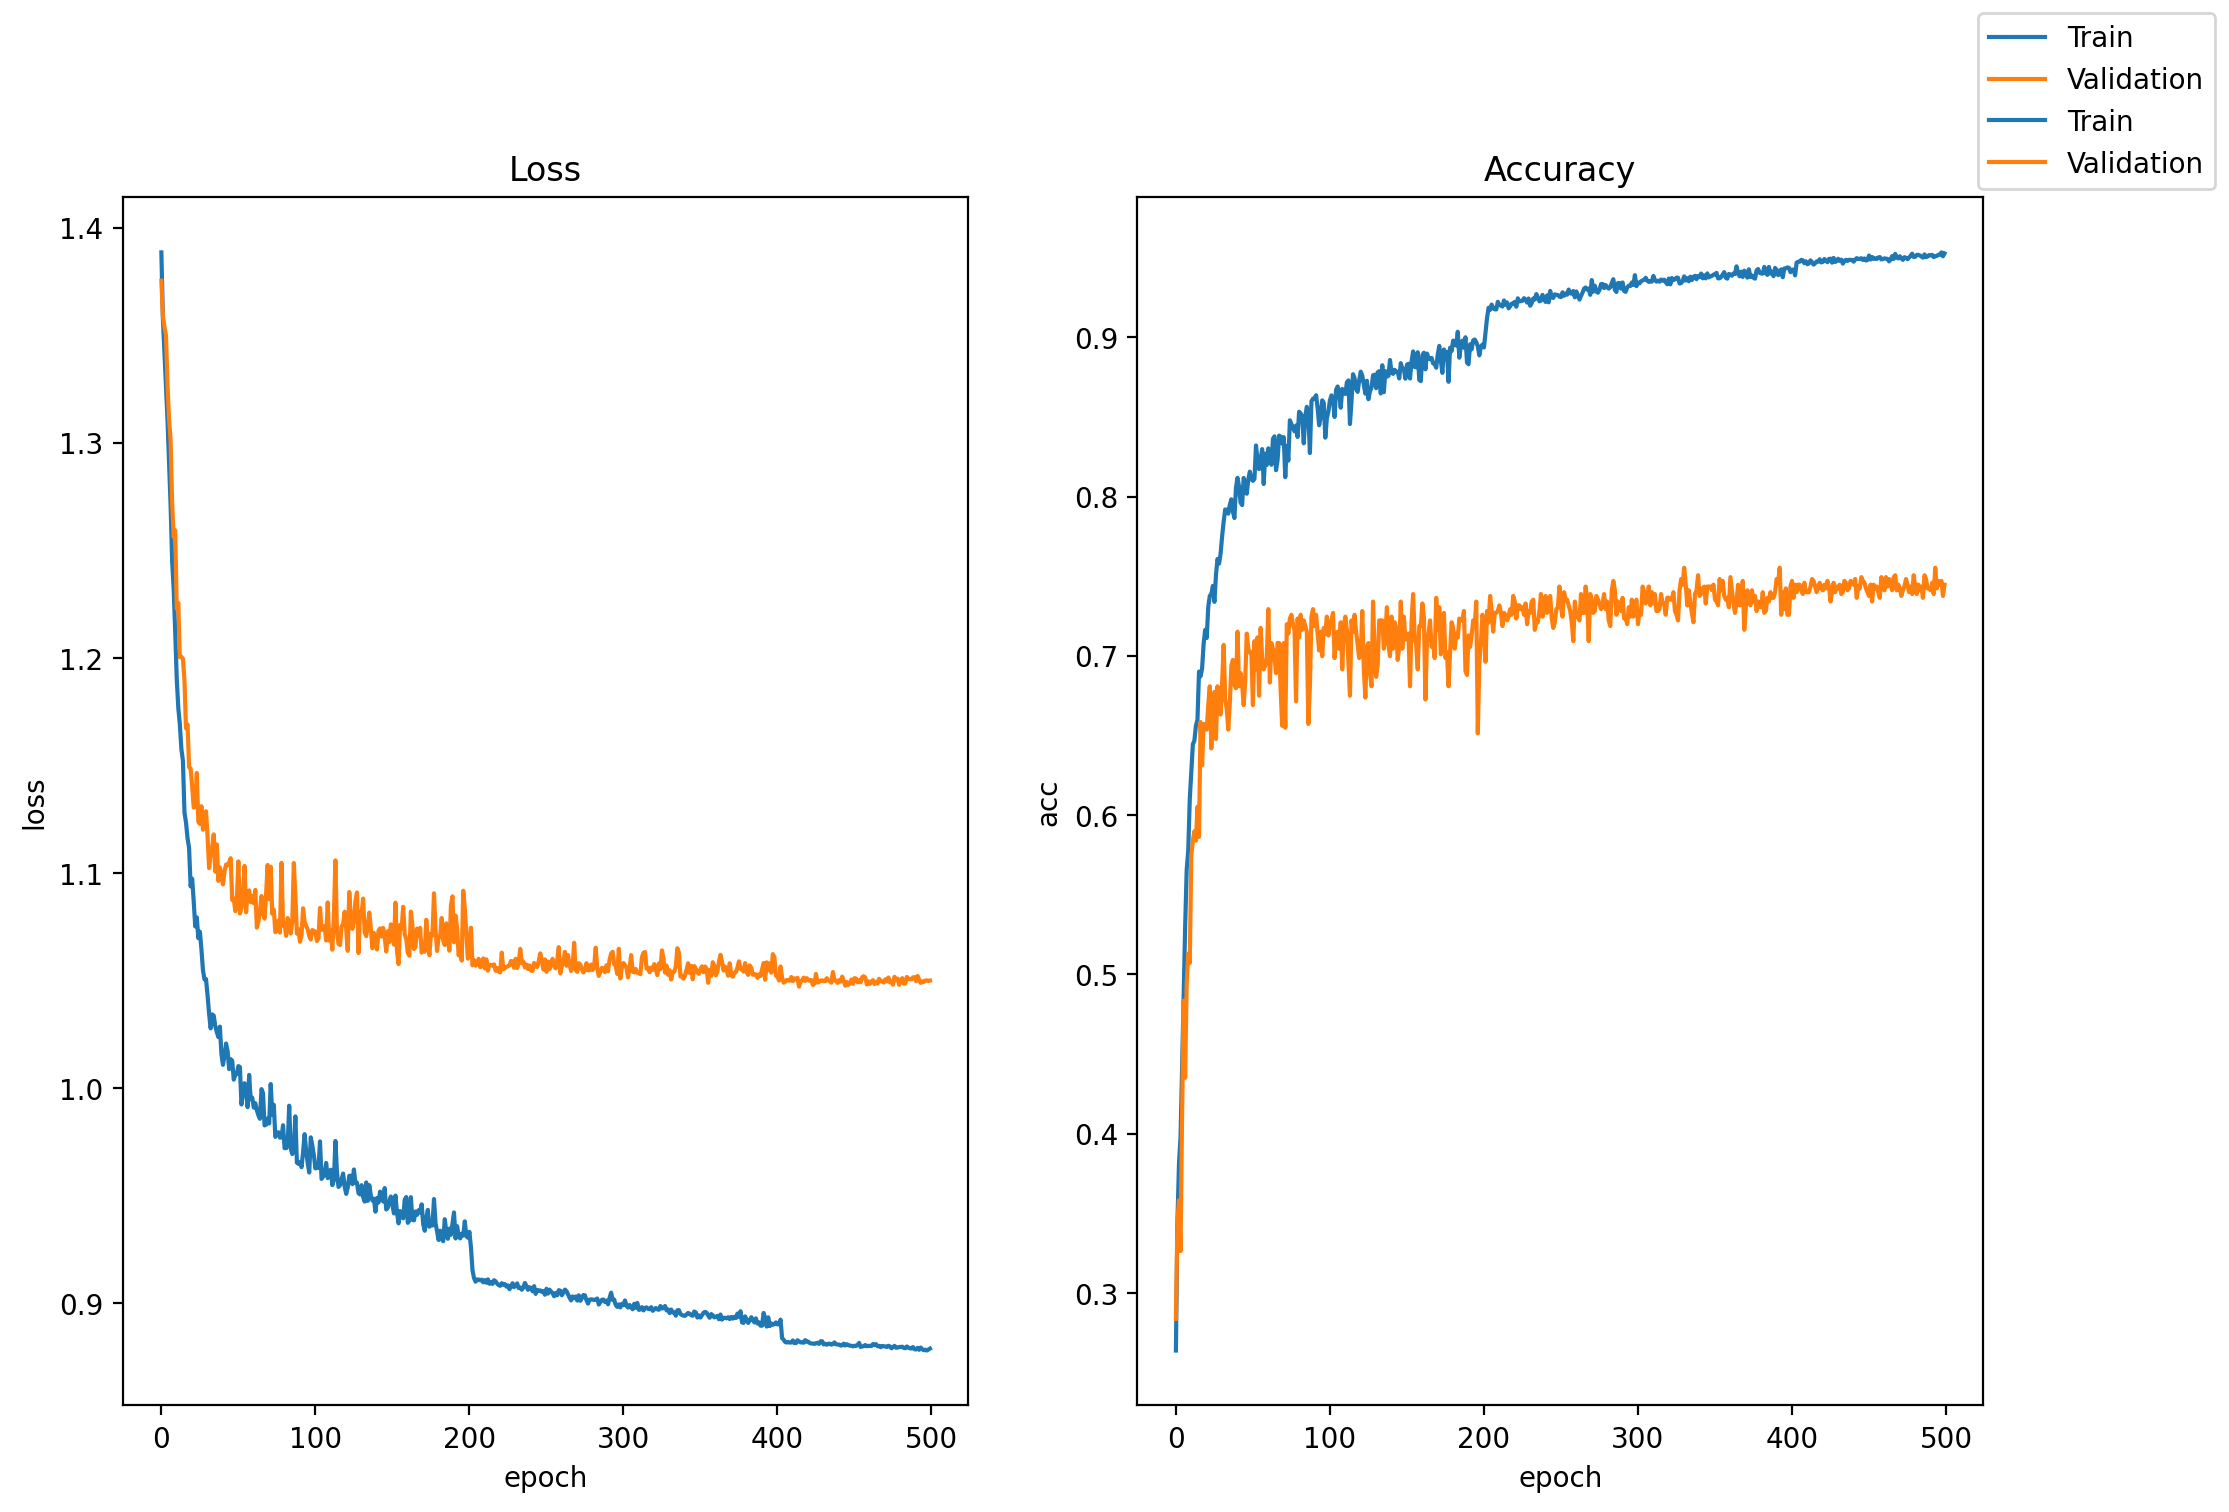

56737	0.721040	
--Iter 49	0.923591
169	0.938870	0.892731	1.061119	0.706856	
--Iter 49	0.931094
170	0.934602	0.900185	1.072084	0.693853	
--Iter 49	0.959373
171	0.939587	0.886624	1.054834	0.723404	
--Iter 49	0.899018
172	0.939239	0.888856	1.060484	0.731678	
--Iter 49	0.920418
173	0.938203	0.893152	1.052418	0.742317	
--Iter 49	0.906747
174	0.938943	0.886919	1.070299	0.704492	
--Iter 49	0.941855
175	0.936294	0.891636	1.056595	0.732861	
--Iter 49	0.916037
176	0.933772	0.898964	1.049516	0.754137	
--Iter 49	0.938750
177	0.933949	0.897869	1.056493	0.723404	
--Iter 49	0.880123
178	0.936745	0.896858	1.050587	0.725768	
--Iter 49	0.953526
179	0.933312	0.900059	1.064027	0.705674	
--Iter 49	0.908528
180	0.932207	0.901196	1.052397	0.722222	
--Iter 49	0.939234
181	0.931244	0.897195	1.048265	0.741135	
--Iter 49	0.948913
182	0.929275	0.908651	1.051952	0.748227	
--Iter 49	0.942748
183	0.932954	0.904018	1.062231	0.717494	
--Iter 49	0.894273
184	0.929345	0.899006	1.049142	0.736407	
--Iter 49	0.911793
185	0

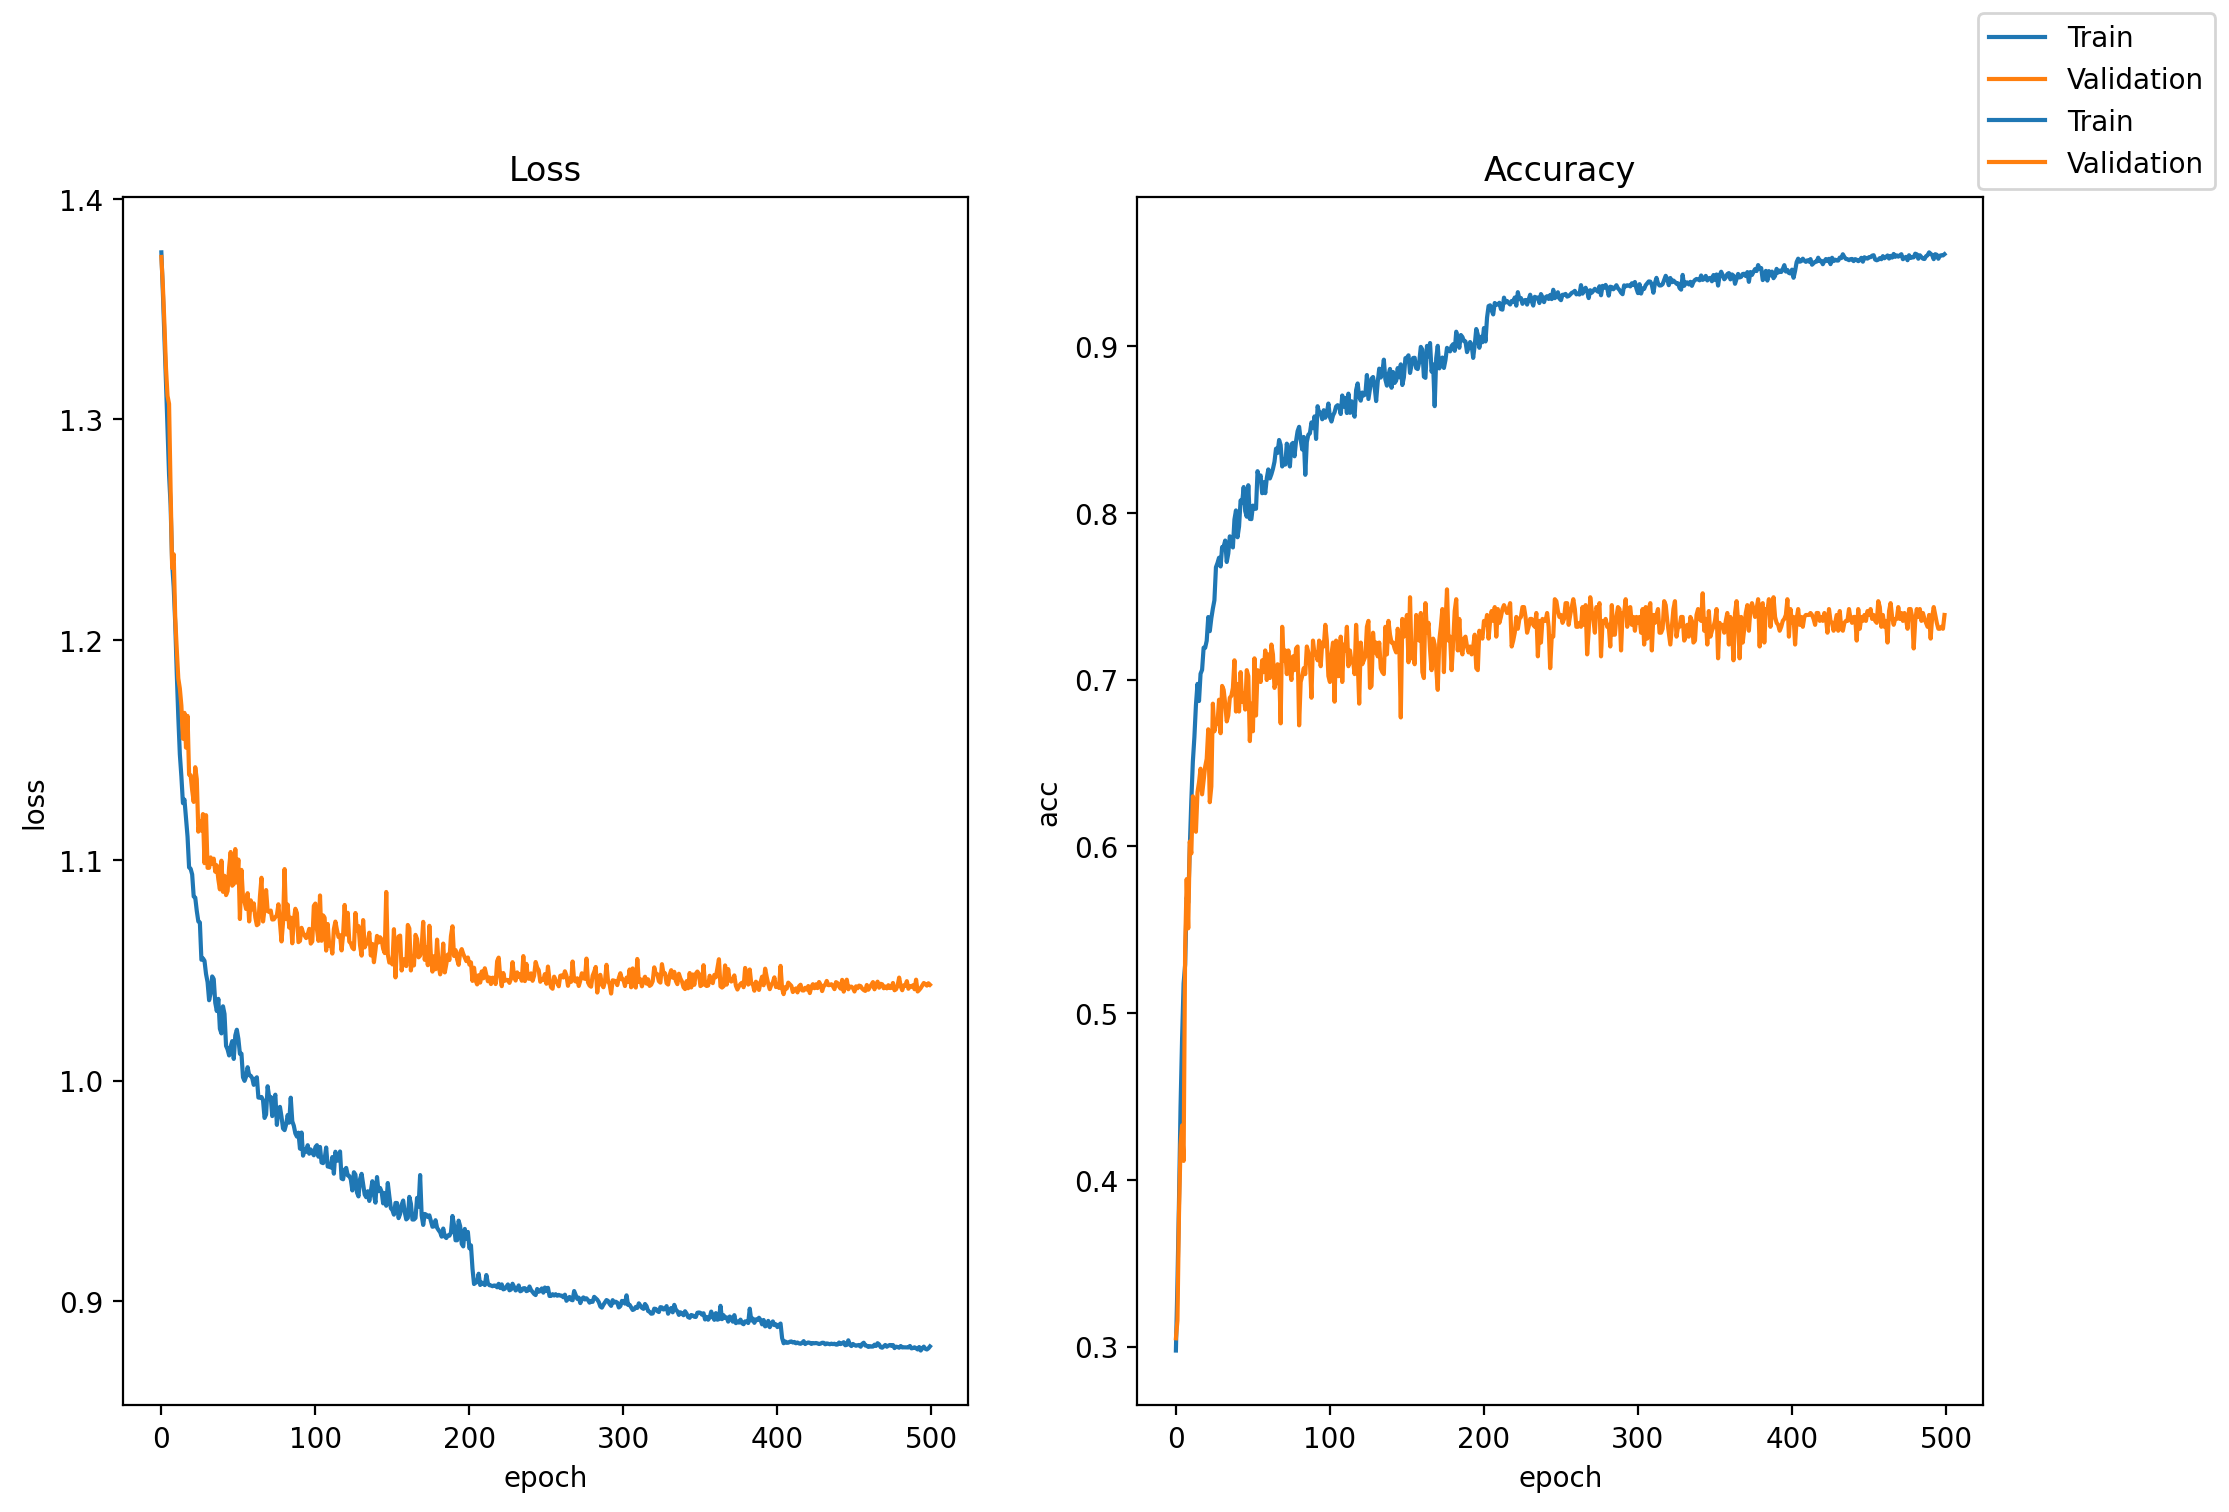

43343	0.731678	
--Iter 49	0.921058
169	0.942301	0.886540	1.045007	0.730496	
--Iter 49	0.924757
170	0.943005	0.882328	1.039920	0.738771	
--Iter 49	0.959198
171	0.940842	0.888309	1.045267	0.742317	
--Iter 49	0.948578
172	0.944544	0.881823	1.049592	0.721040	
--Iter 49	0.928951
173	0.941628	0.885361	1.033521	0.749409	
--Iter 49	0.940363
174	0.941499	0.885403	1.046754	0.736407	
--Iter 49	0.925417
175	0.939427	0.887845	1.045235	0.747045	
--Iter 49	0.934195
176	0.948554	0.880222	1.046313	0.752955	
--Iter 49	0.925315
177	0.940170	0.891931	1.032961	0.741135	
--Iter 49	0.947515
178	0.940561	0.888730	1.049236	0.732861	
--Iter 49	0.953292
179	0.941909	0.885361	1.041234	0.737589	
--Iter 49	0.928727
180	0.942408	0.884897	1.035765	0.749409	
--Iter 49	0.991160
181	0.934890	0.894247	1.041885	0.735225	
--Iter 49	0.959655
182	0.940431	0.886961	1.041216	0.745863	
--Iter 49	0.935033
183	0.938520	0.886708	1.038256	0.763593	
--Iter 49	0.923799
184	0.941090	0.885655	1.048580	0.711584	
--Iter 49	0.976008
185	0

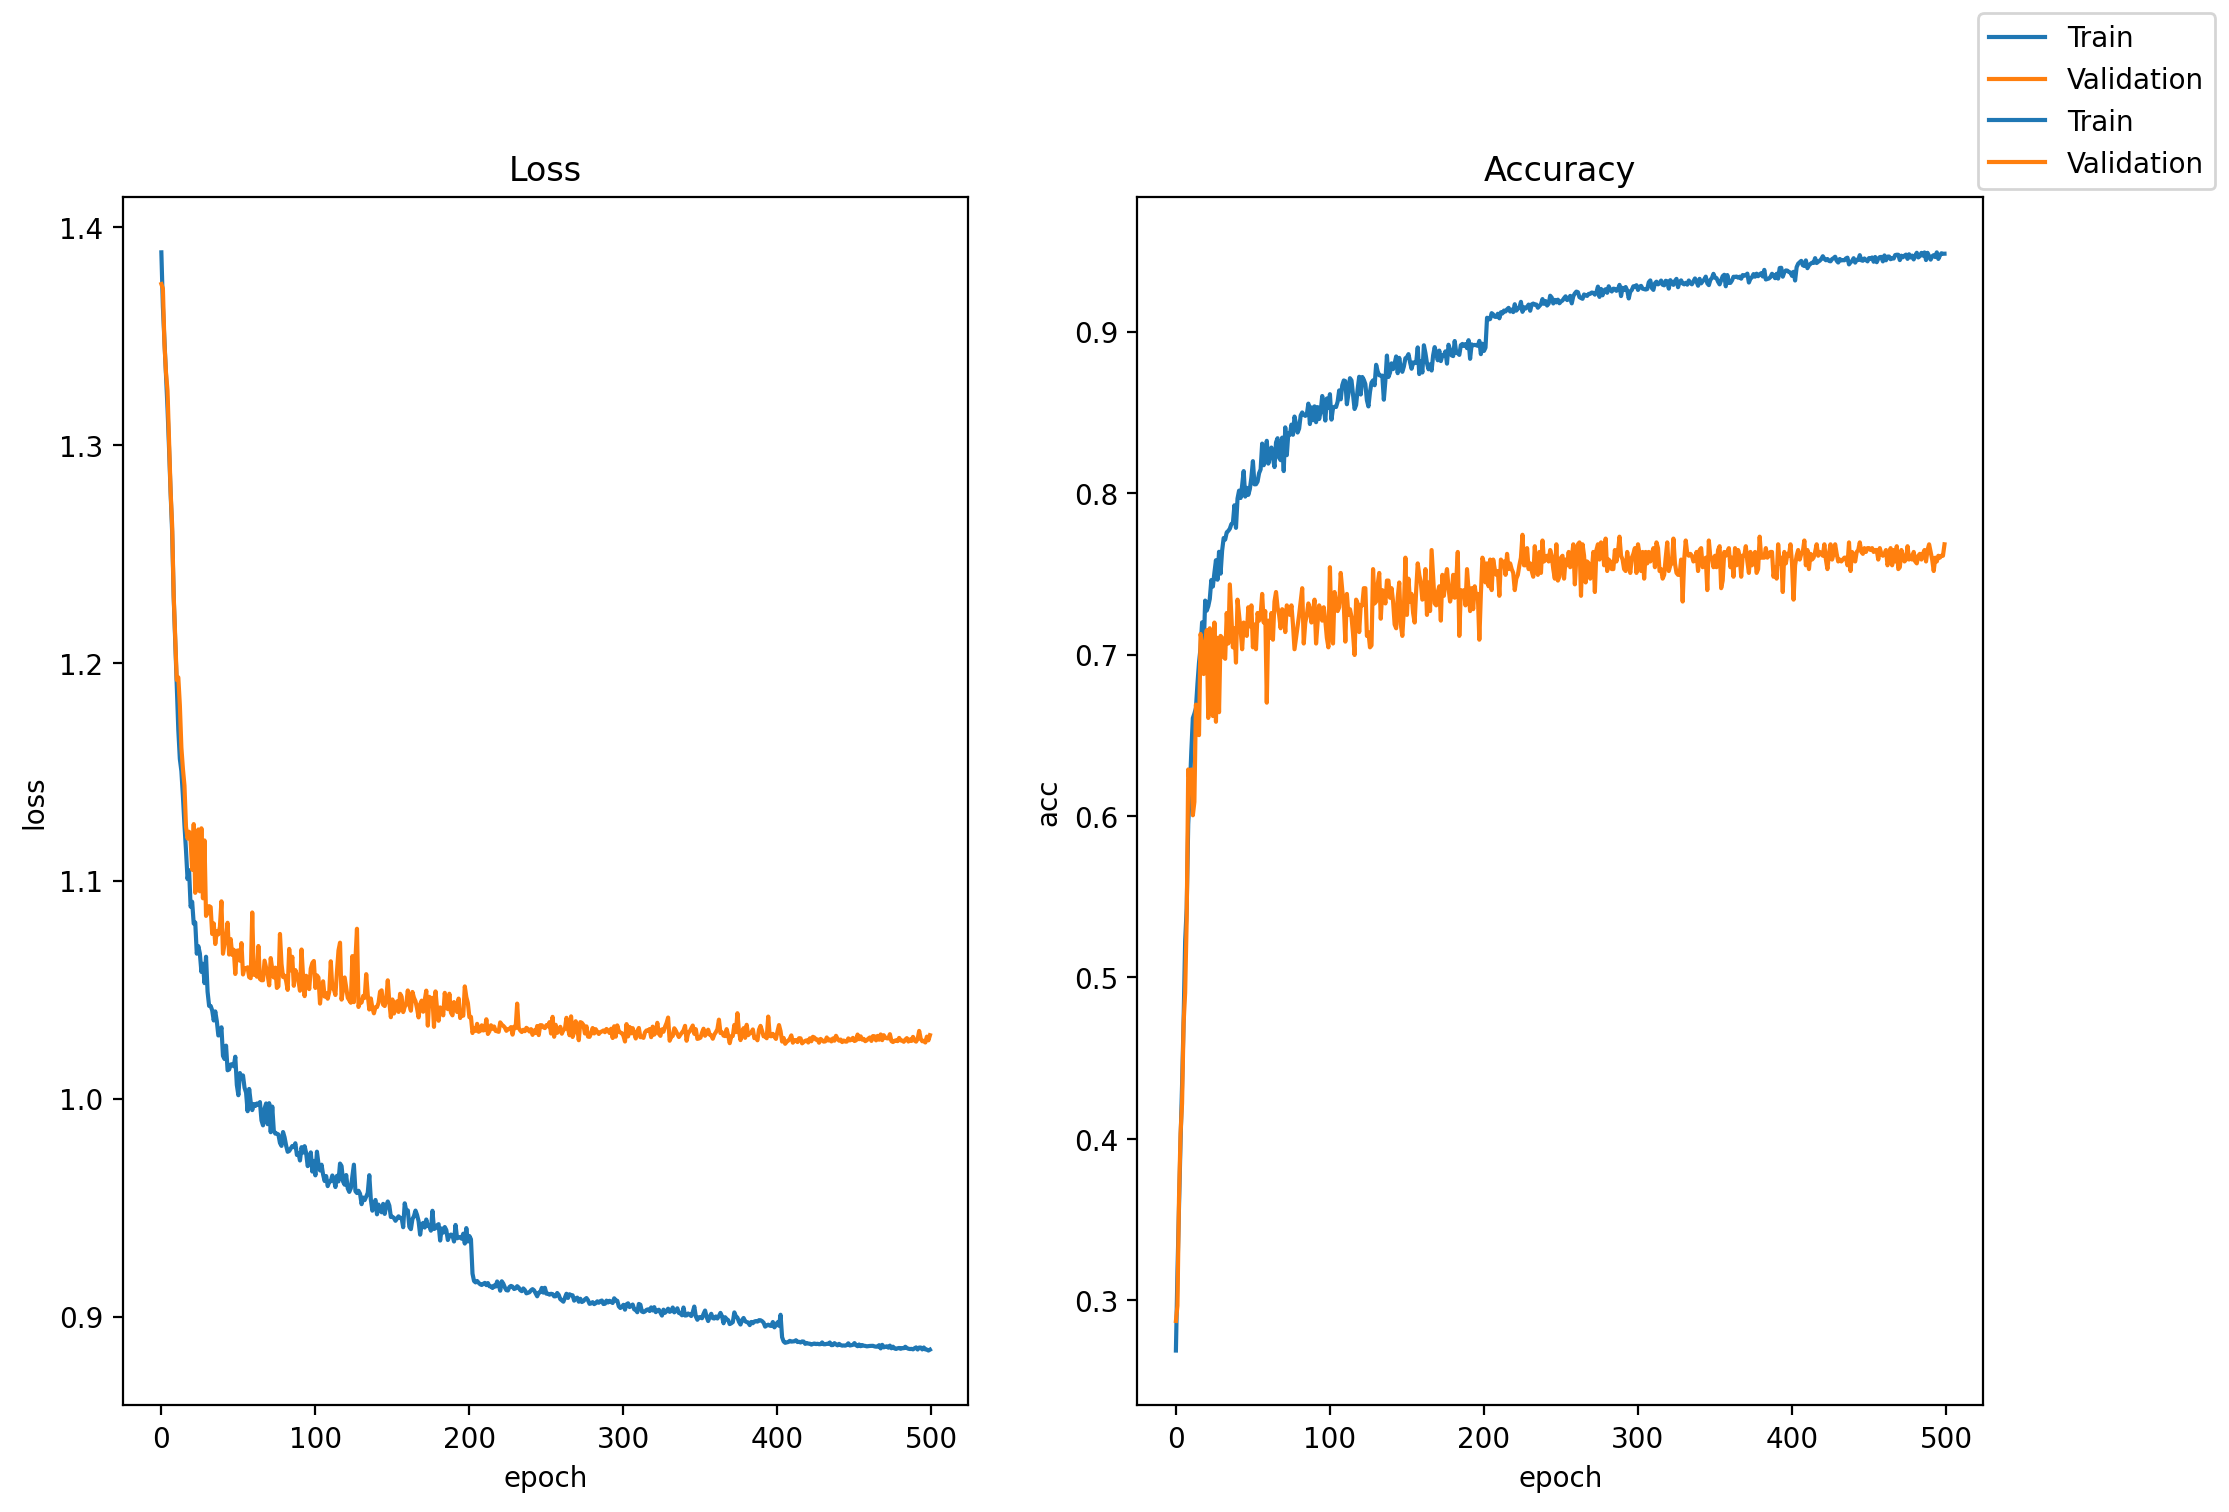

The average test accuracy:0.7348758465011287


In [107]:
train_options = {
    'train_batch_size': 64,
    'scheduler_patience': 150,
    'scheduler_factor': 0.3,
    'weight_decay': 0.10,
    'val_batch_size': 1,
    'learning_rate': 1e-4,
    'epoch_num': 500,
    'downsample_split': True,
}
dsp_opt ={
    'conv_size':[13,25],
    'conv_out_channel' : [40,40],
    'fc1_out_channel' :40,

}
model = PSCNN(in_channels=1,classes=4,option=dsp_opt).to('cuda')
summary(model.cuda(),(1,22,500))
loss_fn = nn.CrossEntropyLoss()
"""
logs,_= train(model, train_options, loss_fn,
        data_dir=X_train_val_01_45_ds_dir,
        label_dir=y_train_valid_dsample_dir,
        preload_gpu=True)
"""
data_dir = {
    'X_train_dir': X_train_val_01_45_ds_dir,
    'y_train_dir':y_train_valid_dsample_dir,
    'X_test_dir': X_test_01_45_ds_dir,
    'y_test_dir':y_test_dsample_dir,
}

test_acc = avg_test_acc(PSCNN,(1,22,500),data_dir,loss_fn,
                        train_options,dsp_opt,trails=10)
print('The average test accuracy:{}'.format(test_acc))


In [108]:
print('The average test accuracy:{}'.format(test_acc))


The average test accuracy:0.7348758465011287


## Shallow with random drop 


78448	0.716312	
--Iter 49	0.973604
669	1.010436	0.780071	1.078721	0.719858	
--Iter 49	1.006245
670	1.014551	0.774848	1.078189	0.713948	
--Iter 49	0.998051
671	1.009840	0.787567	1.078485	0.716312	
--Iter 49	1.003201
672	1.008626	0.782471	1.079194	0.717494	
--Iter 49	0.974996
673	1.011713	0.785756	1.078777	0.718676	
--Iter 49	0.977594
674	1.006109	0.794685	1.078202	0.721040	
--Iter 49	0.982319
675	1.009555	0.788199	1.078274	0.717494	
--Iter 49	1.024993
676	1.006603	0.791737	1.077795	0.721040	
--Iter 49	1.011549
677	1.009245	0.782556	1.078642	0.717494	
--Iter 49	1.000522
678	1.008664	0.787104	1.078095	0.711584	
--Iter 49	0.956829
679	1.006524	0.788915	1.078050	0.716312	
--Iter 49	1.109900
680	1.006499	0.784030	1.078400	0.716312	
--Iter 49	0.923405
681	1.007768	0.786051	1.078336	0.715130	
--Iter 49	0.990690
682	1.011927	0.781082	1.077935	0.717494	
--Iter 49	0.954221
683	1.008190	0.790431	1.078028	0.722222	
--Iter 49	0.963967
684	1.011956	0.778007	1.078637	0.717494	
Epoch   685: reducing le

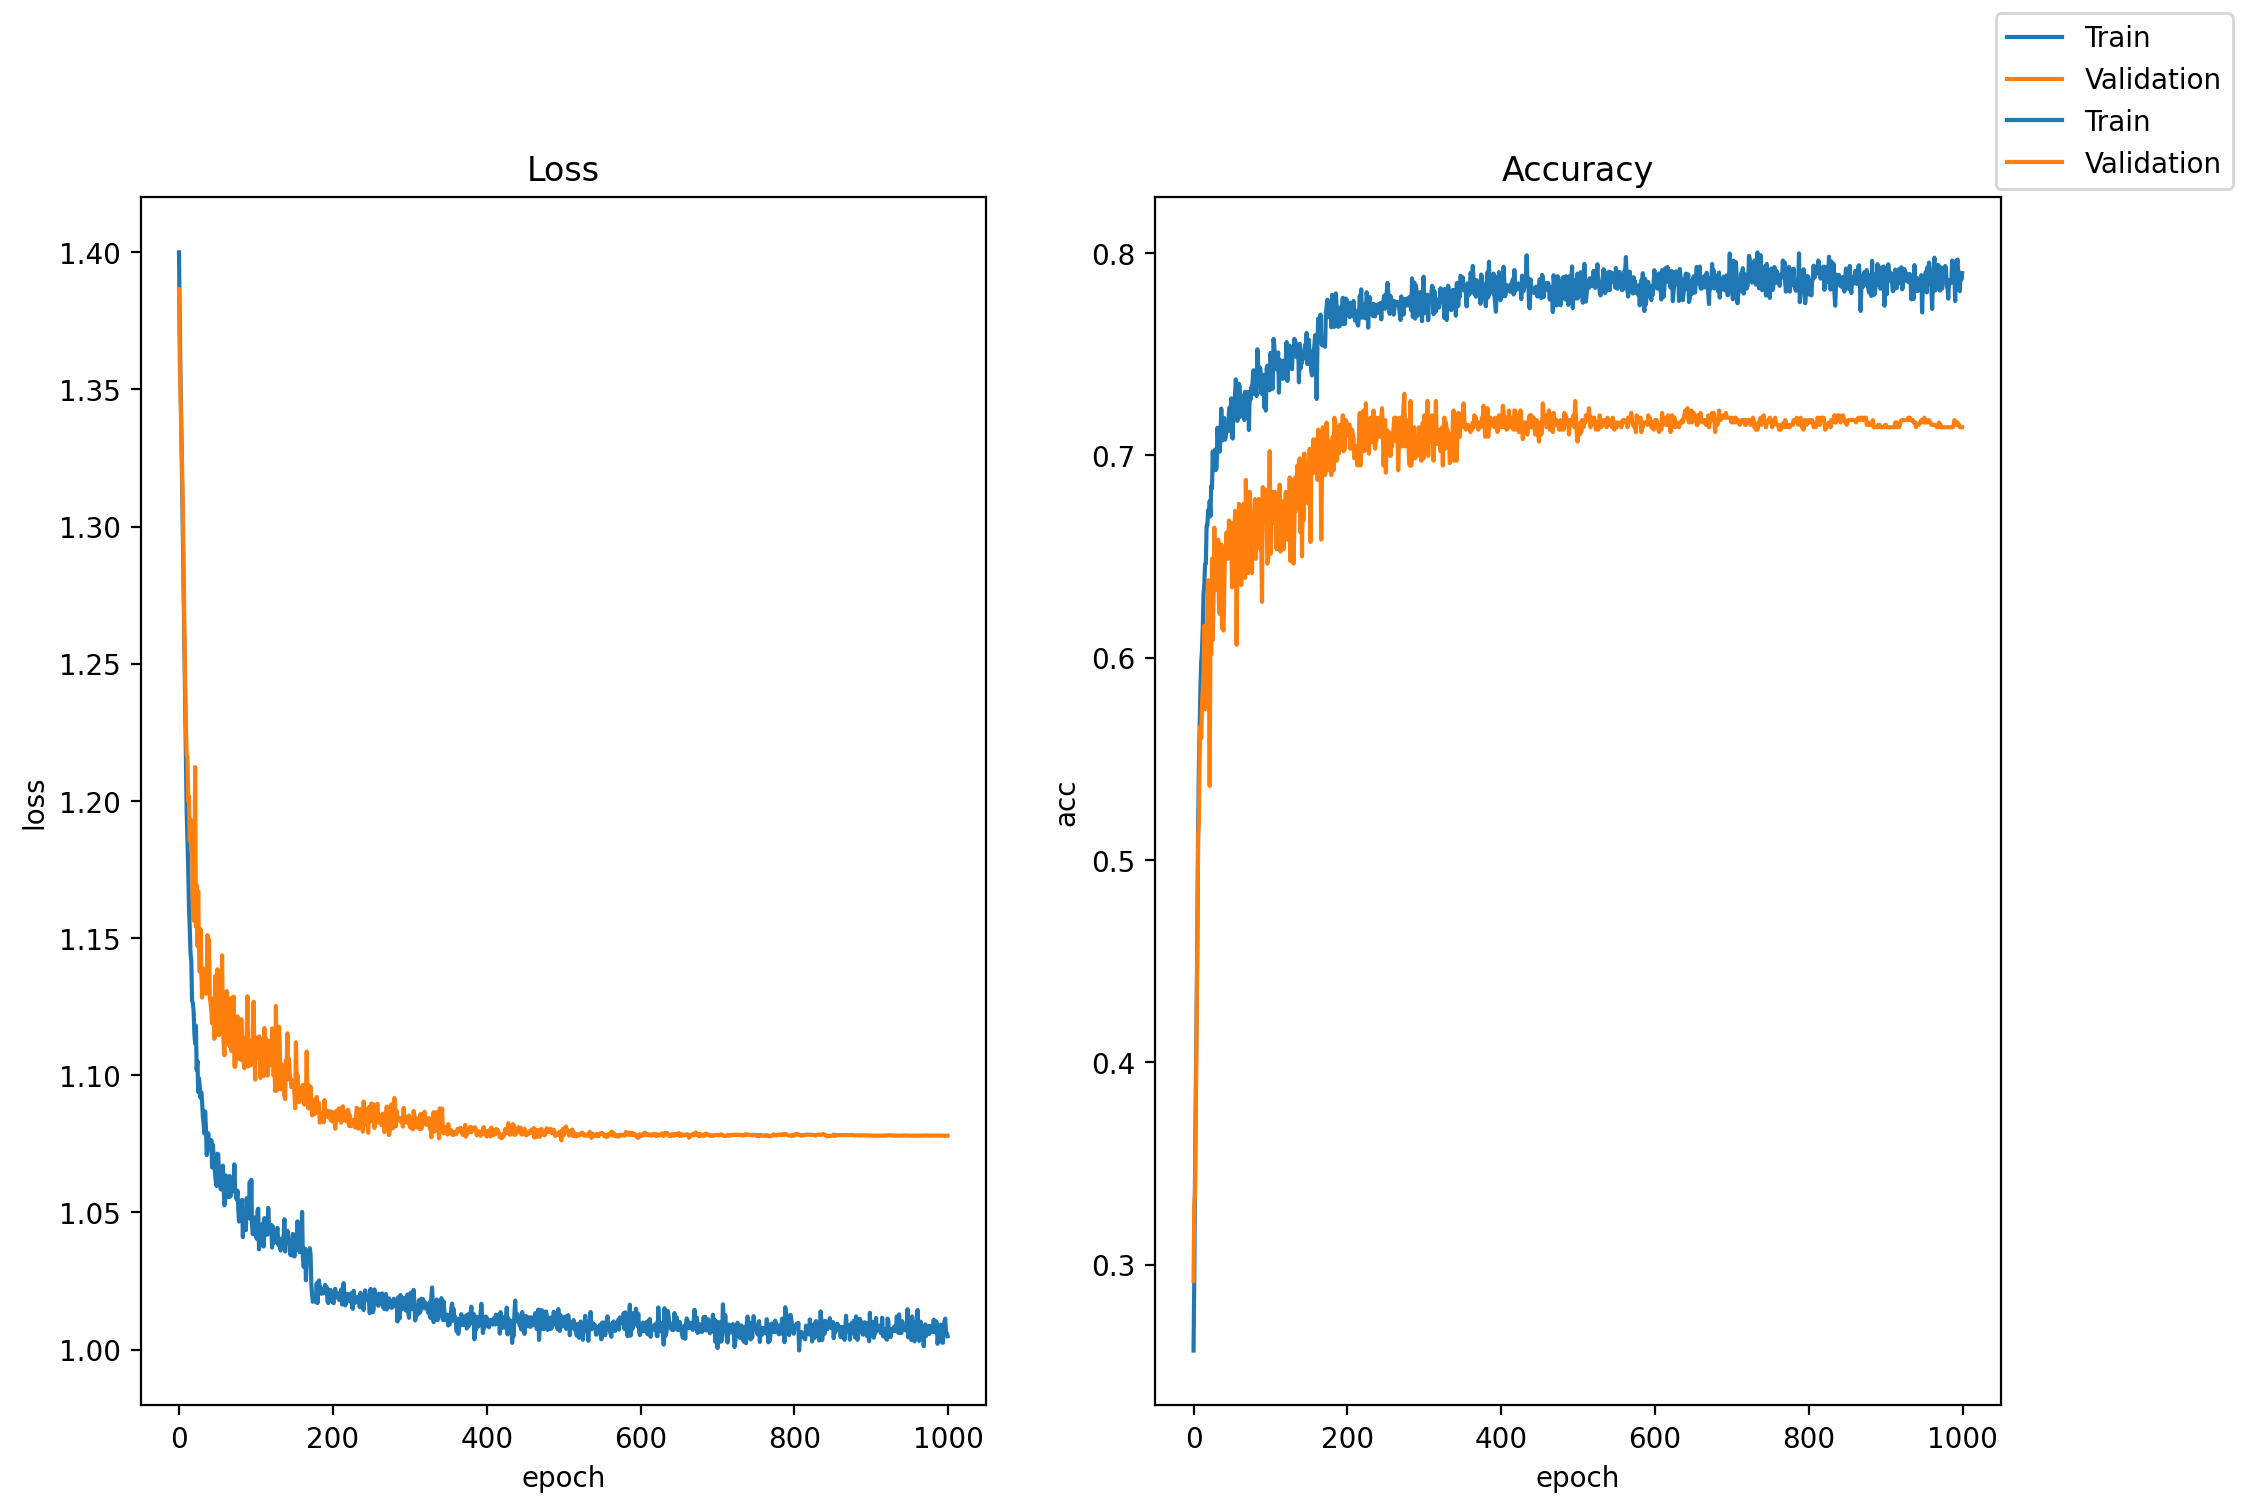

In [67]:
model = ShallowConv2(in_channels=1,classes=4).to('cuda')
loss_fn = nn.CrossEntropyLoss()
logs,_= train(model, train_options, loss_fn,
        data_dir=X_train_val_01_45_ds_dir,
        label_dir=y_train_valid_dsample_dir,
        preload_gpu=True)

In [72]:
test_loader = eeg_test_loader(X_test_dsample_dir,y_test_dsample_dir)
avg_loss, acc = test_net(model,test_loader,loss_fn,'cuda')
print('The test data set accuracy is : {}'.format(acc))

The test data set accuracy is : 0.6918735891647856
